# Personal Information
Name: **Wouter Knibbe**

StudentID: **12795526**

Email: [**wouter.knibbe@student.uva.nl**](wouter.knibbe@student.uva.nl)

Github **https://github.com/WouterKnibbe/ATSP_hillForHard**

Submitted on: **05.03.2024**

In [1]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import algorithm
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib.animation import FuncAnimation
from PIL import Image

### Helper functions

In [2]:
def custom_encoder(obj):
    """
    Custom JSON encoder function that converts non-serializable objects.
    Converts:
    - numpy arrays to lists
    - numpy int64 to int
    - numpy float64 to float
    """
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.floating):
        return float(obj)
    elif isinstance(obj, np.inf):
        return "np.inf"
    else:
        # This will raise a TypeError for unknown types
        raise TypeError(f"Object of type '{obj.__class__.__name__}' is not JSON serializable")

def save_merged(results, citysize, range):

    x = 0
    while True:
        file_path = f"Results/results{citysize}_{range}_m.json"
        if not os.path.exists(file_path):
            break
        x += 1

    # Dumping the nested_dict to a json file with custom encoding
    with open(file_path, "w") as json_file:
        json.dump(results, json_file, default=custom_encoder)

    print(f"Results saved to JSON file successfully as {file_path}")

In [3]:
def custom_decoder(obj):
    """
    Custom decoder function that converts specific JSON values back to their original types.
    Converts:
    - 'Infinity' to np.inf
    """
    if isinstance(obj, dict):
        for key, value in obj.items():
            if value == "Infinity":
                obj[key] = np.inf
            # elif isinstance(value, list):
                # Convert lists back to arrays
                # obj[key] = np.array(value)
            elif isinstance(value, dict):
                obj[key] = custom_decoder(value)
    elif isinstance(obj, list):
        for i, value in enumerate(obj):
            if value == "Infinity":
                obj[i] = np.inf
            # elif isinstance(value, list):
                # obj[i] = np.array(value)
            elif isinstance(value, dict):
                obj[i] = custom_decoder(value)
    return obj

def load_result(file_path):

  # Loading the JSON file with custom decoding
  with open(file_path, "r") as json_file:
      loaded_results = json.load(json_file, object_hook=custom_decoder)

  return loaded_results

In [4]:
def find_hardest_matrix2(loaded):
    # Find the maximum hardness value
    max_hardness = list(loaded[-1][1].values())[-1][1]
    
    # Initialize the hardest matrix
    hardest_matrix = None
    
    # Traverse through the data in reverse order
    for i in range(len(loaded) - 1, -1, -1):
        values_list = list(loaded[i][1].values())
        for j in range(len(values_list) - 1, -1, -1):
            # Check if the current hardness is equal to the maximum hardness
            if values_list[j][0] == max_hardness:
                # Assign the hardest matrix value
                hardest_matrix = values_list[j][4]
                return max_hardness, hardest_matrix
    
    return max_hardness, hardest_matrix

### Combine files

In [5]:
# import re

# cities = [30, 50]
# ranges = [15, 20]

# for city in cities:
#     for range_val in ranges:
#         # Construct the directory path
#         directory_path = f"Results"
        
#         # Get all files in the directory
#         files = os.listdir(directory_path)
        
#         # Filter files based on the pattern: results{city}_{range}_x.json where x is any number
#         pattern = re.compile(rf'^results{city}_{range_val}_\d+\.json$')
#         json_files = [file for file in files if pattern.match(file)]

#         # Proceed if there are any matching files
#         if json_files and len(json_files) > 1:
#             # Sort files to maintain order, assuming numeric sorting is desired
#             json_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

#             # Load the initial dictionary from the first file
#             base_dict = load_result(os.path.join(directory_path, json_files[0]))
#             last_key = max([int(k) for k in base_dict.keys()], default=0)

#             # Merge the remaining dictionaries
#             for file in json_files[1:]:  # Skip the first file as it's already loaded
#                 current_dict = load_result(os.path.join(directory_path, file))
#                 adjusted_dict = {str(int(key) + last_key): value for key, value in current_dict.items()}
#                 base_dict.update(adjusted_dict)
#                 last_key = max([int(k) for k in base_dict.keys()])

#             # Save the merged dictionary
#             save_merged(base_dict, city, range_val)

### Data overview

In [6]:
# Define the parameters
cities = [30, 50, 70]
ranges = [10, 15, 20, 25, 30, 35, 40, 45, 50]
results_path = 'Results/'

# Initialize a dictionary to store the counts
count_runs = {city: {range_val: 0 for range_val in ranges} for city in cities}

# Get a list of all run directories
runs = [name for name in os.listdir(results_path) if os.path.isdir(os.path.join(results_path, name))]

# Count the runs for each city and range
for run in runs:
    for city in cities:
        for range_val in ranges:
            # Construct the base path for checking files
            base_path = os.path.join(results_path, run, f'results{city}_{range_val}.json')
            
            # Check if the base file exists
            if os.path.exists(base_path):
                count_runs[city][range_val] += 1

lowest = 100
# Print the results
for city in cities:
    for range_val in ranges:
        current = count_runs[city][range_val]
        if current < lowest:
            lowest = current
        print(f"City: {city}, randMax: {range_val}, Count: {count_runs[city][range_val]}")
print("Lowest:",lowest)

City: 30, randMax: 10, Count: 49
City: 30, randMax: 15, Count: 49
City: 30, randMax: 20, Count: 49
City: 30, randMax: 25, Count: 49
City: 30, randMax: 30, Count: 49
City: 30, randMax: 35, Count: 48
City: 30, randMax: 40, Count: 48
City: 30, randMax: 45, Count: 48
City: 30, randMax: 50, Count: 48
City: 50, randMax: 10, Count: 49
City: 50, randMax: 15, Count: 49
City: 50, randMax: 20, Count: 49
City: 50, randMax: 25, Count: 49
City: 50, randMax: 30, Count: 48
City: 50, randMax: 35, Count: 48
City: 50, randMax: 40, Count: 47
City: 50, randMax: 45, Count: 48
City: 50, randMax: 50, Count: 48
City: 70, randMax: 10, Count: 49
City: 70, randMax: 15, Count: 49
City: 70, randMax: 20, Count: 49
City: 70, randMax: 25, Count: 49
City: 70, randMax: 30, Count: 48
City: 70, randMax: 35, Count: 54
City: 70, randMax: 40, Count: 51
City: 70, randMax: 45, Count: 51
City: 70, randMax: 50, Count: 43
Lowest: 43


In [11]:
# get std
base_path = f"Results/6019314_run1/results30_10.json"
loaded = load_result(base_path)
np.ma.masked_invalid(np.array(list(loaded[-1][1].values())[-1][4])).std()

2.5904537289566676

### Get hardest at every generation

In [ ]:
cities = [30, 50, 70]
ranges = [10, 15, 20, 25, 30, 35, 40, 45, 50]

results_path = 'Results/'
runs = [name for name in os.listdir(results_path) if os.path.isdir(os.path.join(results_path, name))]

data_to_save = {}

for city in cities:
    data_to_save[city] = {}
    for range_val in ranges:
        max_x_values = []
        run_data = []
        conv_list = []
        k = 0

        for run in runs:
            if k > lowest:
                break
            base_path = f"Results/{run}/results{city}_{range_val}"
            if not os.path.exists(base_path + '.json'):
                continue
            k += 1
            file_paths = [base_path + '.json']
            # Automatically add files that are extensions of the main file
            part_num = 0
            while os.path.exists(base_path + f'_{part_num}.json'):
                file_paths.append(base_path + f'_{part_num}.json')
                part_num += 1

            combined_x_values = []
            combined_y_values = []

            for path in file_paths:
                try:
                    loaded = load_result(path)
                except:
                    continue

                for hundred_gens in loaded:
                    current_x_values = list(hundred_gens[1].keys())
                    current_y_values_1 = [values[1] for values in hundred_gens[1].values()]

                    combined_x_values.extend(current_x_values)
                    combined_y_values.extend(current_y_values_1)

            if len(combined_x_values) > len(max_x_values):
                max_x_values = combined_x_values
            run_data.append((combined_x_values, combined_y_values))
            if combined_y_values:
                conv_list.append(len(combined_y_values))

        data_to_save[city][range_val] = {
            "run_data": run_data,
            "conv_list": conv_list,
            "max_x_values": max_x_values
        }

with open('superraam.json', 'w') as f:
    json.dump(data_to_save, f)

### Get last hardness for all data

In [87]:
# cities = [30, 50, 70]
# ranges = [10, 15, 20, 25, 30, 35, 40, 45, 50]

# results_path = 'Results/'
# runs = [name for name in os.listdir(results_path) if os.path.isdir(os.path.join(results_path, name))]

# for city in cities:
#     all_data = {range_val: [] for range_val in ranges}
#     for range_val in ranges:
#         last_y_values = []
#         k=0

#         for run in runs:
#             if k > lowest:
#                 break
#             base_path = f"Results/{run}/results{city}_{range_val}"
#             if not os.path.exists(base_path + '.json'):
#                 continue
#             k+=1
#             file_paths = [base_path + '.json']
#             part_num = 0
#             while os.path.exists(base_path + f'_{part_num}.json'):
#                 file_paths.append(base_path + f'_{part_num}.json')
#                 part_num += 1

#             for file_path in file_paths:
#                 try:
#                     loaded = load_result(file_path)
#                     last_y_values.append(list(loaded[-1][1].values())[-1][1])
#                 except:
#                     continue

#         all_data[range_val].extend(last_y_values)
#     # Save the data to a JSON file
#     output_file_path = f'last_y_values_{city}.json'
#     with open(output_file_path, 'w') as file:
#         json.dump(all_data, file)

### Get last hardness with std

In [ ]:
# cities = [50]
# ranges = [10, 15, 20, 25, 30, 35, 40, 45, 50]

# results_path = 'Results/'
# runs = [name for name in os.listdir(results_path) if os.path.isdir(os.path.join(results_path, name))]

# for city in cities:
#     all_data = {range_val: [] for range_val in ranges}
#     for range_val in ranges:
#         last_y_values = []
#         last_x_values = []
#         k=0

#         for run in runs:
#             if k > lowest:
#                 break
#             base_path = f"Results/{run}/results{city}_{range_val}"
#             if not os.path.exists(base_path + '.json'):
#                 continue
#             k+=1
#             file_paths = [base_path + '.json']
#             part_num = 0
#             while os.path.exists(base_path + f'_{part_num}.json'):
#                 file_paths.append(base_path + f'_{part_num}.json')
#                 part_num += 1

#             for file_path in file_paths:
#                 try:
#                     loaded = load_result(file_path)
#                     max_hardness, hardest_matrix = find_hardest_matrix2(loaded)
#                     last_y_values.append(max_hardness)
#                     last_x_values.append(np.std(np.ma.masked_invalid(hardest_matrix)))
#                 except:
#                     continue

#         all_data[range_val].extend((last_y_values,last_x_values))
#     # Save the data to a JSON file
#     output_file_path = f'last_y_values_wstd_{city}_1.json'
#     with open(output_file_path, 'w') as file:
#         json.dump(all_data, file)

### Get hardness of first matrices with std

In [ ]:
cities = [30,70]
ranges = [10, 15, 20, 25, 30, 35, 40, 45, 50]

results_path = 'Results/'
runs = [name for name in os.listdir(results_path) if os.path.isdir(os.path.join(results_path, name))]

for city in cities:
    all_data = {range_val: [] for range_val in ranges}
    for range_val in ranges:
        last_y_values = []
        last_x_values = []
        k=0

        for run in runs:
            if k > lowest:
                break
            base_path = f"Results/{run}/results{city}_{range_val}"
            if not os.path.exists(base_path + '.json'):
                continue
            k+=1
            file_paths = [base_path + '.json']
            part_num = 0
            while os.path.exists(base_path + f'_{part_num}.json'):
                file_paths.append(base_path + f'_{part_num}.json')
                part_num += 1

            for file_path in file_paths:
                try:
                    loaded = load_result(file_path)
                    last_y_values.append(list(loaded[0][1].values())[0][0])
                    last_x_values.append(np.std(np.ma.masked_invalid(list(loaded[0][1].values())[0][4])))
                except:
                    continue

        all_data[range_val].extend((last_y_values,last_x_values))
    # Save the data to a JSON file
    output_file_path = f'easy_y_values_wstd_{city}.json'
    with open(output_file_path, 'w') as file:
        json.dump(all_data, file)

### Plot Figures

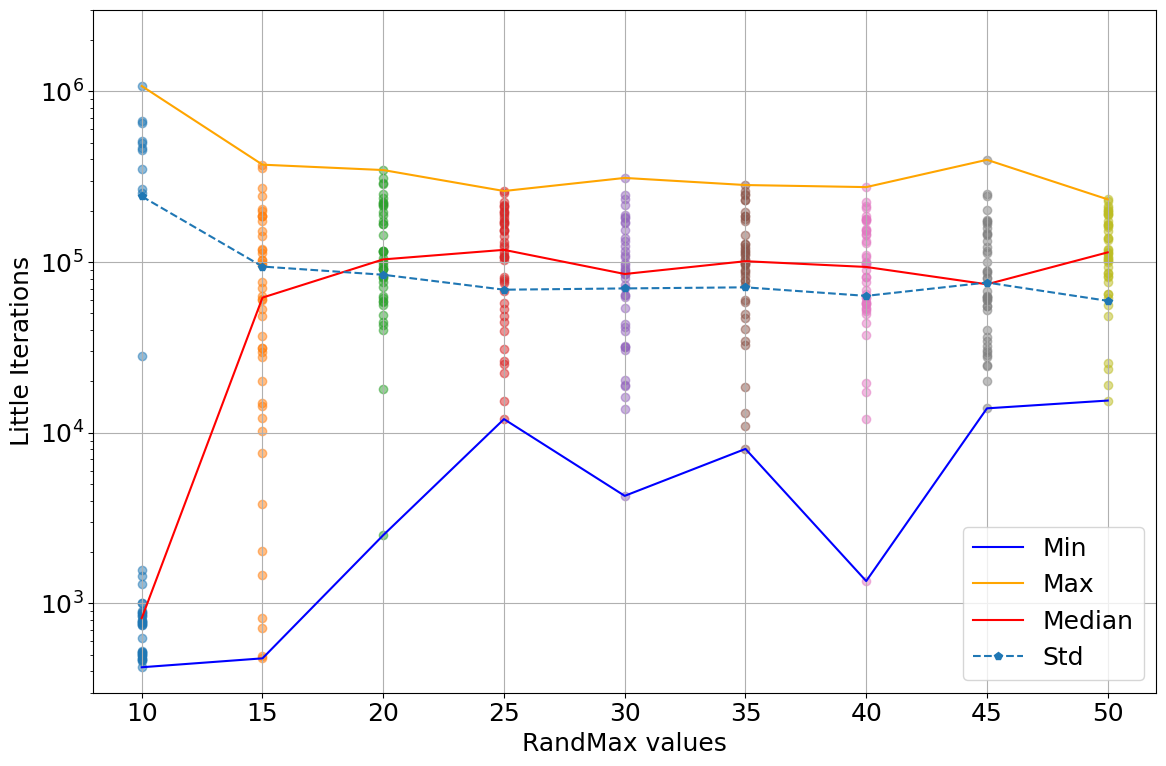

In [13]:
# Define the path to the JSON file
input_file_path = 'last_y_values_30.json'

# Read the data from the JSON file
with open(input_file_path, 'r') as file:
    all_data = json.load(file)

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcdefaults()
plt.rcParams.update({'font.size': 18})

global_min = 300 # Adjusted to avoid log(0)
global_max = 3000000

min_vals = []
max_vals = []
median_vals = []
mean_vals = []
stdl = []

# Plotting
for range_val, values in all_data.items():
    if values:
        range_val = int(range_val)
        x = [range_val] * len(values)
        ax.scatter(x, values, alpha=0.5, label='Data Points' if range_val == list(all_data.keys())[0] else "")
        
        # Statistics
        stats = np.array(values)
        min_val = np.min(stats)
        max_val = np.max(stats)
        median_val = np.median(stats)
        mean_val = np.mean(stats)
        std_val = np.std(stats)
        
        min_vals.append((range_val, min_val))
        max_vals.append((range_val, max_val))
        median_vals.append((range_val, median_val))
        mean_vals.append((range_val, mean_val))
        stdl.append((range_val, std_val))
        
        # Annotation if max value exceeds global_max
        if max_val > global_max:
            ax.text(range_val+1.5, global_max-25, f'^{int(max_val)}', ha='center', color='orange')

# Plotting statistics as lines across the graph
min_vals_x, min_vals_y = zip(*min_vals)
max_vals_x, max_vals_y = zip(*max_vals)
median_vals_x, median_vals_y = zip(*median_vals)
mean_vals_x, mean_vals_y = zip(*mean_vals)
std_vals_x, std_vals_y = zip(*stdl)

ax.plot(min_vals_x, min_vals_y, 'b-', label='Min')
ax.plot(max_vals_x, max_vals_y, 'orange', label='Max')
ax.plot(median_vals_x, median_vals_y, 'r-', label='Median')
# ax.plot(mean_vals_x, mean_vals_y, 'g--', label='Mean')
ax.plot(std_vals_x, std_vals_y, 'p--', label='Std')

# Set logarithmic scale
ax.set_yscale('log')

ax.set_xlabel('RandMax values')
ax.set_ylabel('Little Iterations')
ax.set_xticks([int(key) for key in all_data.keys()])
ax.set_xticklabels([int(key) for key in all_data.keys()])
ax.set_ylim(global_min, global_max)
plt.grid(True)

# Adding legend to the plot
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # removing duplicate labels

plt.tight_layout()
plt.legend(by_label.values(), by_label.keys())
plt.show()

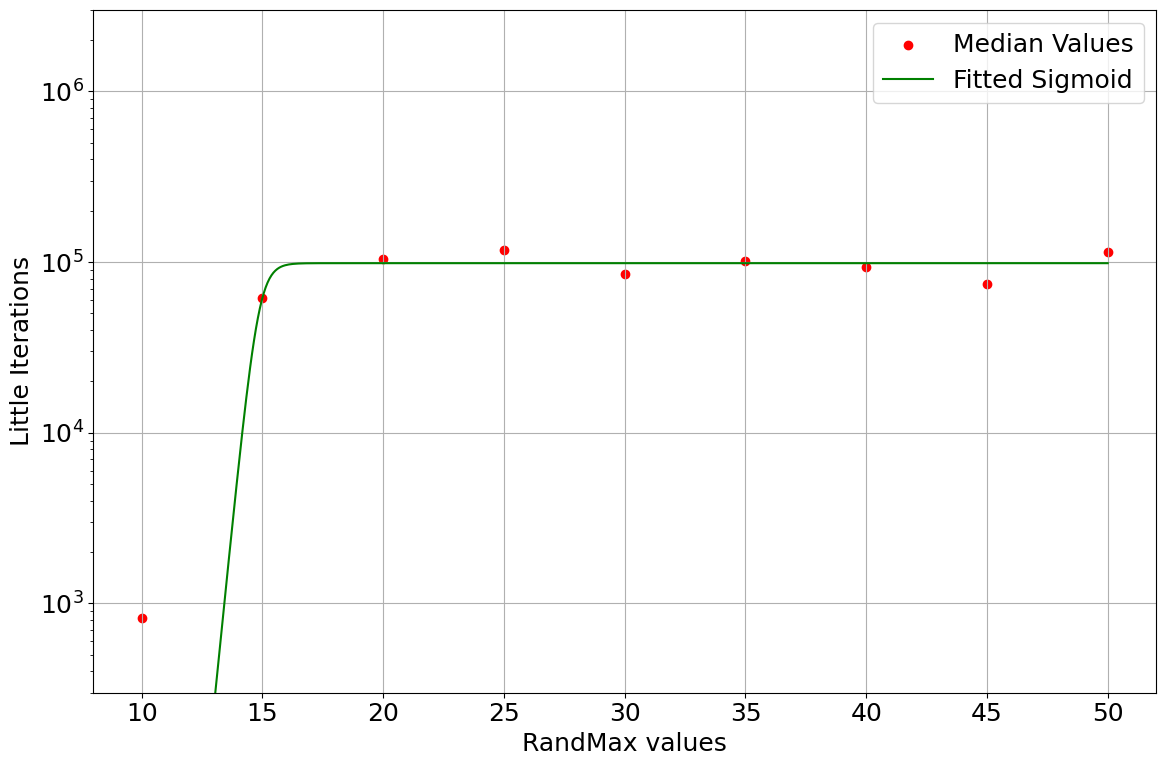

(98576.21486077644,
 14.837330657119399,
 3.230178084164698,
 0.8596375451159743,
 12700.26876457736)

In [14]:
# Define the sigmoid function
def sigmoid(x, L, x0, k):
    return L / (1 + np.exp(-k * (x - x0)))

# Extract median values from the data
median_vals_x, median_vals_y = zip(*median_vals)

# Initial guess for the parameters L, x0, and k
initial_guess = [max(median_vals_y), np.median(median_vals_x), 1]

# Perform curve fitting
popt, pcov = curve_fit(sigmoid, median_vals_x, median_vals_y, p0=initial_guess)

# Extract the optimal parameters
L_opt, x0_opt, k_opt = popt

# Generate x values for plotting the fitted sigmoid curve
x_values = np.linspace(min(median_vals_x), max(median_vals_x), 500)
fitted_sigmoid = sigmoid(x_values, *popt)

# Calculate predicted values using the sigmoid function
predicted_median_vals_y = sigmoid(median_vals_x, *popt)

# Calculate R-squared value
r_squared = r2_score(median_vals_y, predicted_median_vals_y)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(median_vals_y, predicted_median_vals_y))

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcdefaults()
plt.rcParams.update({'font.size': 18})

# Plot original median values
ax.scatter(median_vals_x, median_vals_y, color='r', label='Median Values')

# Plot fitted sigmoid curve
ax.plot(x_values, fitted_sigmoid, label='Fitted Sigmoid', color='g')

# Set logarithmic scale
ax.set_yscale('log')

ax.set_xlabel('RandMax values')
ax.set_ylabel('Little Iterations')
ax.set_xticks([int(key) for key in all_data.keys()])
ax.set_xticklabels([int(key) for key in all_data.keys()])
ax.set_ylim(global_min, global_max)
plt.grid(True)

# Adding legend to the plot
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # removing duplicate labels

plt.tight_layout()
plt.legend(by_label.values(), by_label.keys())
plt.show()

# Display the fitted sigmoid parameters and goodness of fit metrics
L_opt, x0_opt, k_opt, r_squared, rmse

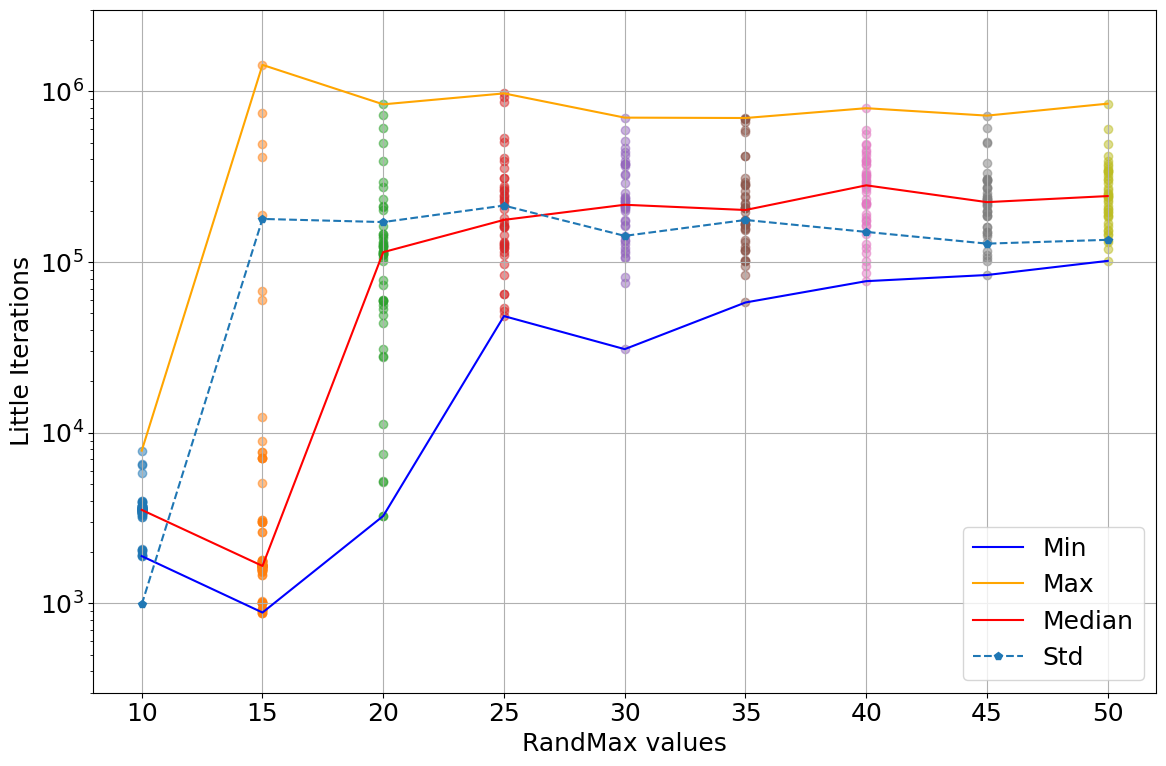

In [44]:
# Define the path to the JSON file
input_file_path = 'last_y_values_50.json'

# Read the data from the JSON file
with open(input_file_path, 'r') as file:
    all_data = json.load(file)

fig, ax = plt.subplots(figsize=(12, 8))

global_min = 300  # Adjusted to avoid log(0)
global_max = 3000000

min_vals = []
max_vals = []
median_vals = []
mean_vals = []
stdl = []

# Plotting
for range_val, values in all_data.items():
    if values:
        range_val = int(range_val)
        x = [range_val] * len(values)
        ax.scatter(x, values, alpha=0.5, label='Data Points' if range_val == list(all_data.keys())[0] else "")
        
        # Statistics
        stats = np.array(values)
        min_val = np.min(stats)
        max_val = np.max(stats)
        median_val = np.median(stats)
        mean_val = np.mean(stats)
        std_val = np.std(stats)
        
        min_vals.append((range_val, min_val))
        max_vals.append((range_val, max_val))
        median_vals.append((range_val, median_val))
        mean_vals.append((range_val, mean_val))
        stdl.append((range_val, std_val))
        
        # Annotation if max value exceeds global_max
        if max_val > global_max:
            ax.text(range_val+1.5, global_max-25, f'^{int(max_val)}', ha='center', color='orange')

# Plotting statistics as lines across the graph
min_vals_x, min_vals_y = zip(*min_vals)
max_vals_x, max_vals_y = zip(*max_vals)
median_vals_x, median_vals_y = zip(*median_vals)
mean_vals_x, mean_vals_y = zip(*mean_vals)
std_vals_x, std_vals_y = zip(*stdl)

ax.plot(min_vals_x, min_vals_y, 'b-', label='Min')
ax.plot(max_vals_x, max_vals_y, 'orange', label='Max')
ax.plot(median_vals_x, median_vals_y, 'r-', label='Median')
# ax.plot(mean_vals_x, mean_vals_y, 'g--', label='Mean')
ax.plot(std_vals_x, std_vals_y, 'p--', label='Std')

# Set logarithmic scale
ax.set_yscale('log')

ax.set_xlabel('RandMax values')
ax.set_ylabel('Little Iterations')
ax.set_xticks([int(key) for key in all_data.keys()])
ax.set_xticklabels([int(key) for key in all_data.keys()])
ax.set_ylim(global_min, global_max)
plt.grid(True)

# Adding legend to the plot
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # removing duplicate labels

plt.tight_layout()
plt.legend(by_label.values(), by_label.keys())
plt.show()

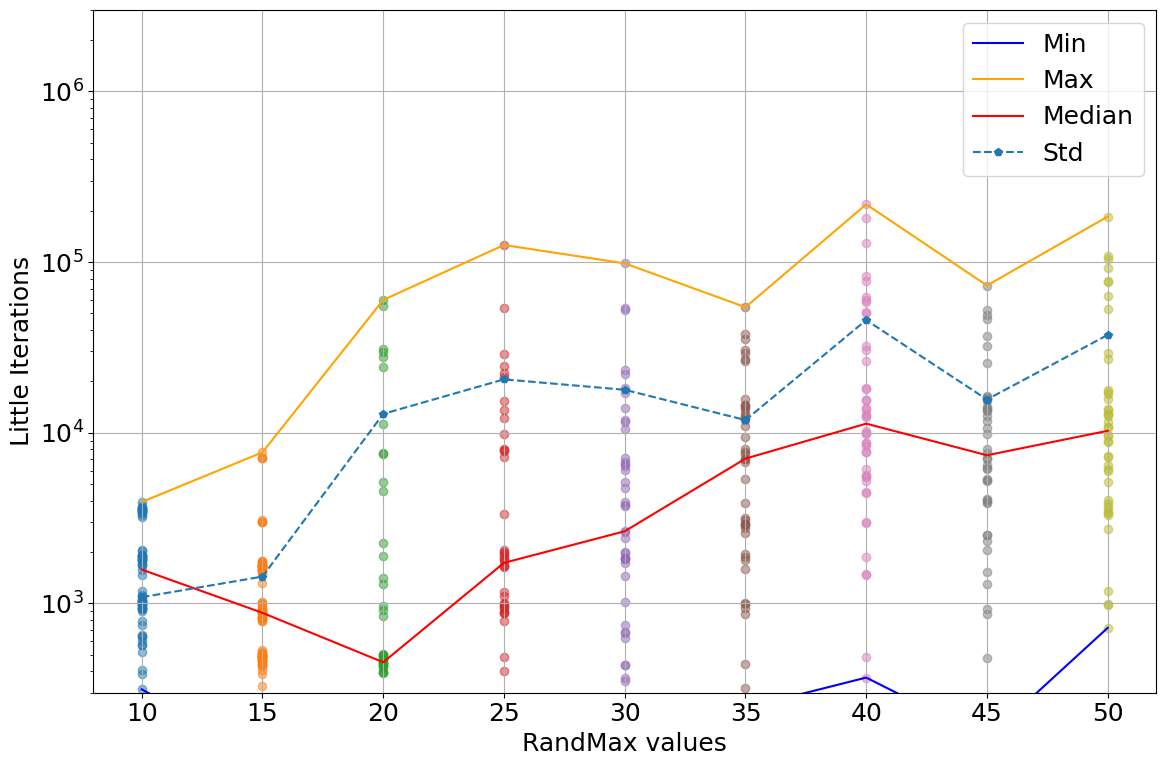

In [14]:
# Define the path to the JSON file
input_file_path = 'easy_y_values_wstd_50.json'

# Read the data from the JSON file
with open(input_file_path, 'r') as file:
    all_data = json.load(file)

fig, ax = plt.subplots(figsize=(12, 8))

global_min = 300  # Adjusted to avoid log(0)
global_max = 3000000

min_vals = []
max_vals = []
median_vals = []
mean_vals = []
stdl = []

# Plotting
for range_val, values in all_data.items():
    values = values[0]
    if values:
        range_val = int(range_val)
        x = [range_val] * len(values)
        ax.scatter(x, values, alpha=0.5, label='Data Points' if range_val == list(all_data.keys())[0] else "")
        
        # Statistics
        stats = np.array(values)
        min_val = np.min(stats)
        max_val = np.max(stats)
        median_val = np.median(stats)
        mean_val = np.mean(stats)
        std_val = np.std(stats)
        
        min_vals.append((range_val, min_val))
        max_vals.append((range_val, max_val))
        median_vals.append((range_val, median_val))
        mean_vals.append((range_val, mean_val))
        stdl.append((range_val, std_val))
        
        # Annotation if max value exceeds global_max
        if max_val > global_max:
            ax.text(range_val+1.5, global_max-25, f'^{int(max_val)}', ha='center', color='orange')

# Plotting statistics as lines across the graph
min_vals_x, min_vals_y = zip(*min_vals)
max_vals_x, max_vals_y = zip(*max_vals)
median_vals_x, median_vals_y = zip(*median_vals)
mean_vals_x, mean_vals_y = zip(*mean_vals)
std_vals_x, std_vals_y = zip(*stdl)

ax.plot(min_vals_x, min_vals_y, 'b-', label='Min')
ax.plot(max_vals_x, max_vals_y, 'orange', label='Max')
ax.plot(median_vals_x, median_vals_y, 'r-', label='Median')
# ax.plot(mean_vals_x, mean_vals_y, 'g--', label='Mean')
ax.plot(std_vals_x, std_vals_y, 'p--', label='Std')

# Set logarithmic scale
ax.set_yscale('log')

ax.set_xlabel('RandMax values')
ax.set_ylabel('Little Iterations')
ax.set_xticks([int(key) for key in all_data.keys()])
ax.set_xticklabels([int(key) for key in all_data.keys()])
ax.set_ylim(global_min, global_max)
plt.grid(True)

# Adding legend to the plot
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # removing duplicate labels

plt.tight_layout()
plt.legend(by_label.values(), by_label.keys())
plt.show()

In [10]:
### Get median difference: hill vs no hill

def load_data(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

def calculate_median_differences(file1, file2):
    data1 = load_data(file1)
    data2 = load_data(file2)

    medians1 = {int(k): np.median(v[0]) for k, v in data1.items() if v[0]}
    medians2 = {int(k): np.median(v[0]) for k, v in data2.items() if v[0]}
    
    differences = []
    
    for key in medians1.keys():
        if key in medians2:
            diff = medians2[key] - medians1[key]
            differences.append(diff)
    
    return np.mean(differences)

ending_numbers = [30, 50, 70]
results = {}

for number in ending_numbers:
    file1 = f'last_y_values_{number}.json'
    file2 = f'easy_y_values_wstd_{number}.json'
    avg_diff = calculate_median_differences(file1, file2)
    results[number] = avg_diff

results

{30: -79124.94444444444, 50: -162184.0, 70: -87958.72222222222}

101775.956284153
64864.19889502763
9736.97435897436


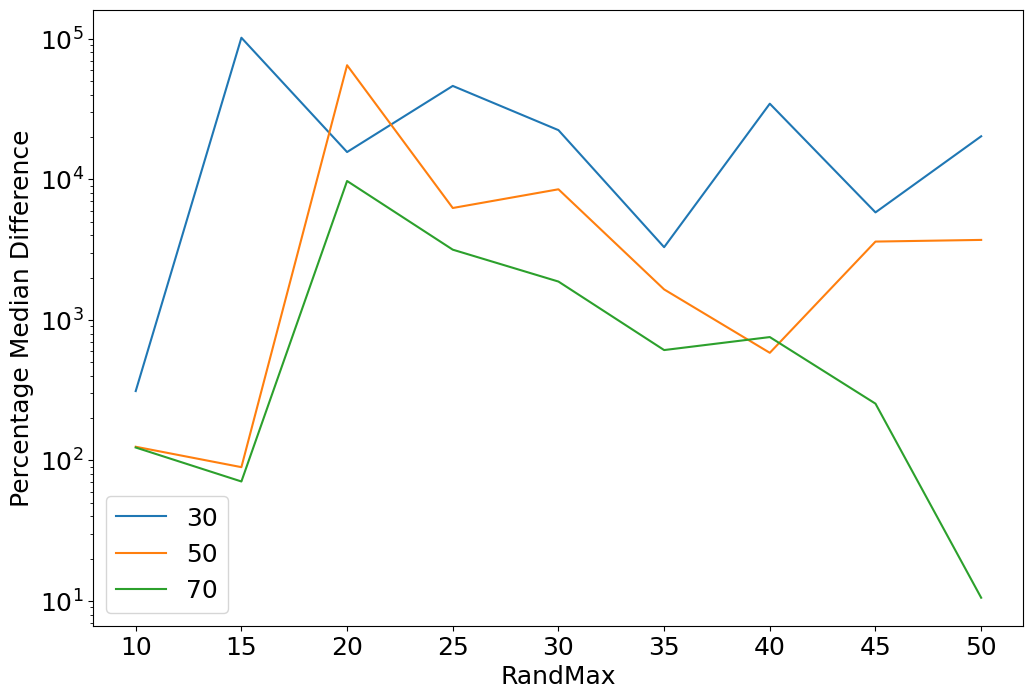

In [19]:
def load_data(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

def calculate_percentage_median_differences(file1, file2):
    data1 = load_data(file1)
    data2 = load_data(file2)

    medians1 = {int(k): np.median(v[0]) for k, v in data1.items() if v[0]}
    medians2 = {int(k): np.median(v[0]) for k, v in data2.items() if v[0]}
    
    percentage_differences = []
    
    for key in medians1.keys():
        if key in medians2:
            if medians1[key] != 0:
                percentage_diff = ((medians1[key] - medians2[key]) / medians2[key]) * 100
                percentage_differences.append(percentage_diff)
    
    return percentage_differences

ending_numbers = [30, 50, 70]
results = {}

for number in ending_numbers:
    file1 = f'last_y_values_{number}.json'
    file2 = f'easy_y_values_wstd_{number}.json'
    avg_percentage_diff = calculate_percentage_median_differences(file1, file2)
    results[number] = avg_percentage_diff
    print(max(avg_percentage_diff))

r = [10, 15, 20, 25, 30, 35, 40, 45, 50]

plt.figure(figsize=(12, 8))
plt.rcdefaults()
plt.rcParams.update({'font.size': 18})

for number, percentage_diffs in results.items():
    plt.plot(r, percentage_diffs, label=f'{number}')

plt.yscale('log')
plt.xlabel('RandMax')
plt.ylabel('Percentage Median Difference')
plt.legend()
plt.show()

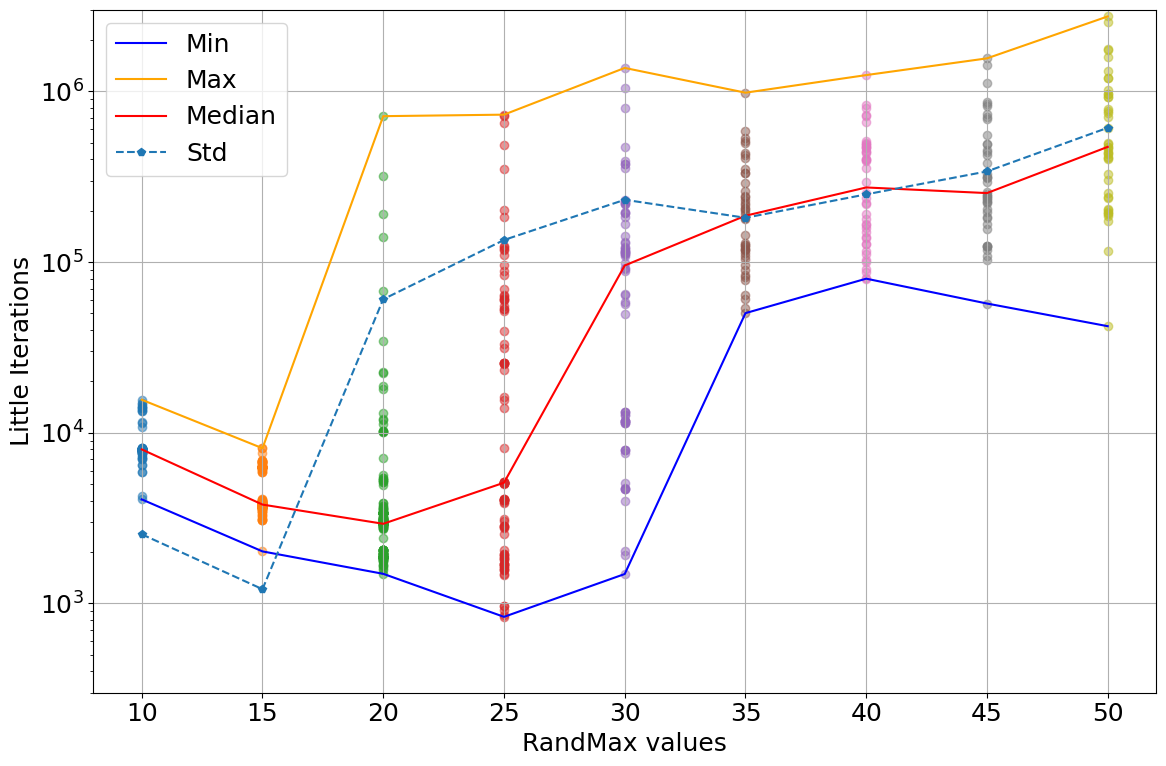

In [45]:
# Define the path to the JSON file
input_file_path = 'last_y_values_70.json'

# Read the data from the JSON file
with open(input_file_path, 'r') as file:
    all_data = json.load(file)

fig, ax = plt.subplots(figsize=(12, 8))

global_min = 300  # Adjusted to avoid log(0)
global_max = 3000000

min_vals = []
max_vals = []
median_vals = []
mean_vals = []
stdl = []

# Plotting
for range_val, values in all_data.items():
    if values:
        range_val = int(range_val)
        x = [range_val] * len(values)
        ax.scatter(x, values, alpha=0.5, label='Data Points' if range_val == list(all_data.keys())[0] else "")
        
        # Statistics
        stats = np.array(values)
        min_val = np.min(stats)
        max_val = np.max(stats)
        median_val = np.median(stats)
        mean_val = np.mean(stats)
        std_val = np.std(stats)
        
        min_vals.append((range_val, min_val))
        max_vals.append((range_val, max_val))
        median_vals.append((range_val, median_val))
        mean_vals.append((range_val, mean_val))
        stdl.append((range_val, std_val))
        
        # Annotation if max value exceeds global_max
        if max_val > global_max:
            ax.text(range_val+1.5, global_max-25, f'^{int(max_val)}', ha='center', color='orange')

# Plotting statistics as lines across the graph
min_vals_x, min_vals_y = zip(*min_vals)
max_vals_x, max_vals_y = zip(*max_vals)
median_vals_x, median_vals_y = zip(*median_vals)
mean_vals_x, mean_vals_y = zip(*mean_vals)
std_vals_x, std_vals_y = zip(*stdl)

ax.plot(min_vals_x, min_vals_y, 'b-', label='Min')
ax.plot(max_vals_x, max_vals_y, 'orange', label='Max')
ax.plot(median_vals_x, median_vals_y, 'r-', label='Median')
# ax.plot(mean_vals_x, mean_vals_y, 'g--', label='Mean')
ax.plot(std_vals_x, std_vals_y, 'p--', label='Std')

# Set logarithmic scale
ax.set_yscale('log')

ax.set_xlabel('RandMax values')
ax.set_ylabel('Little Iterations')
ax.set_xticks([int(key) for key in all_data.keys()])
ax.set_xticklabels([int(key) for key in all_data.keys()])
ax.set_ylim(global_min, global_max)
plt.grid(True)

# Adding legend to the plot
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # removing duplicate labels

plt.tight_layout()
plt.legend(by_label.values(), by_label.keys())
plt.show()

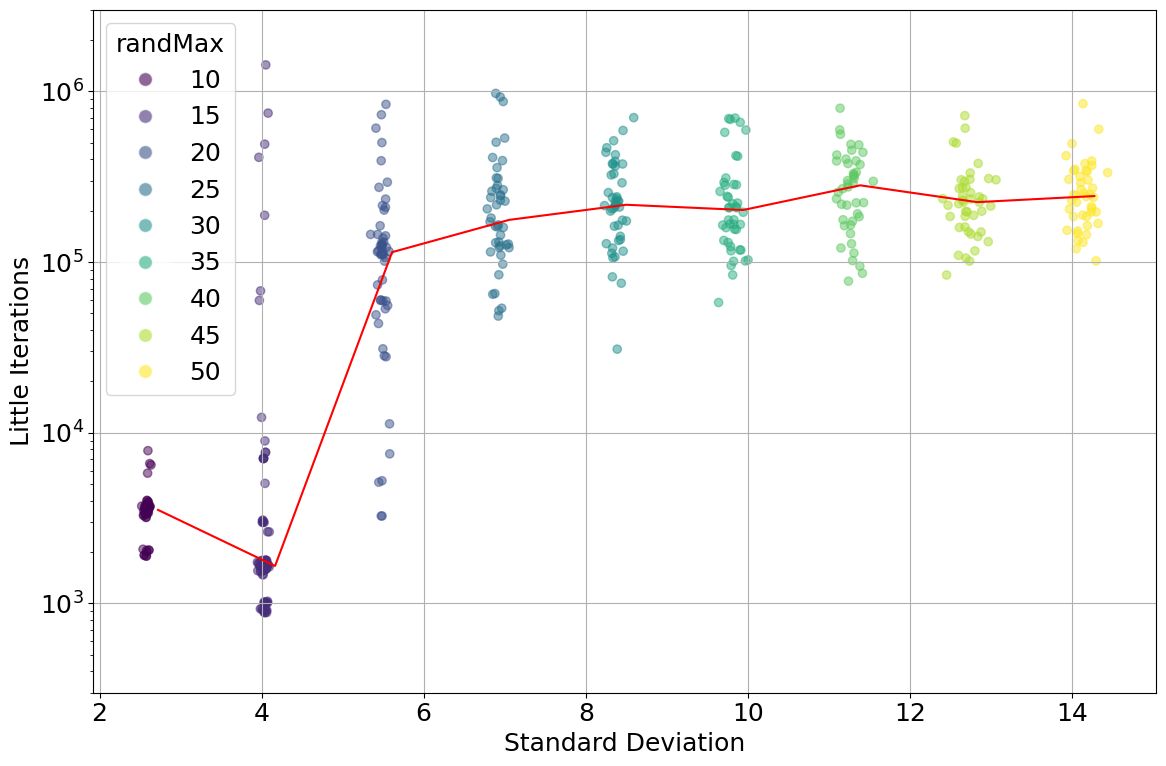

In [17]:
# Load the data from the provided JSON file
input_file_path = 'last_y_values_wstd_50.json'
with open(input_file_path, 'r') as file:
    all_data = json.load(file)

# Extract x and y values from the data
x_values = []
y_values = []
range_values = []  # To keep track of range_val for each point

for range_val, values in all_data.items():
    y_vals, x_vals = values
    y_values.extend(y_vals)
    x_values.extend(x_vals)
    range_values.extend([range_val] * len(y_vals))  # Repeat range_val for each y_val

# Convert lists to numpy arrays for easier processing
x_values = np.array(x_values)
y_values = np.array(y_values)
range_values = np.array(range_values)

# Define bins for categorizing the x-values
bins = np.arange(2, 15, 1.444)  # Example bins from 2 to 14 with step of 1.444
digitized = np.digitize(x_values, bins)

# Calculate median for each bin
median_y_values = [np.median(y_values[digitized == i]) for i in range(1, len(bins))]
median_x_positions = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins) - 1)]

# Create a color map based on the range values
unique_ranges = sorted(list(set(range_values)))  # Sort the unique range values
color_map = cm.get_cmap('viridis', len(unique_ranges))
colors = [color_map(unique_ranges.index(rv)) for rv in range_values]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcdefaults()
plt.rcParams.update({'font.size': 18})

global_min = 300  # Adjusted to avoid log(0)
global_max = 3000000

# Plot the scatter points
scatter = ax.scatter(x_values, y_values, alpha=0.5, c=colors, label='Data Points')

# Plot median lines
ax.plot(median_x_positions, median_y_values, 'r-', label='Median')

# Set logarithmic scale for y-axis
ax.set_yscale('log')

ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Little Iterations')
ax.set_ylim(global_min, global_max)
plt.grid(True)

# Adding legend to the plot
unique_colors = [color_map(i) for i in range(len(unique_ranges))]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=uc, markersize=10, alpha=0.6) for uc in unique_colors]
legend_labels = unique_ranges

plt.tight_layout()
plt.legend(legend_handles, legend_labels, title="randMax")
plt.show()

In [22]:
### Mean std for each randmax

# Load the data from the provided JSON file
input_file_path = 'easy_y_values_wstd_50.json'
with open(input_file_path, 'r') as file:
    all_data = json.load(file)

# Extract x and y values from the data
x_values = []
y_values = []
range_values = []

for range_val, values in all_data.items():
    y_vals, x_vals = values
    y_values.extend(y_vals)
    x_values.extend(x_vals)
    range_values.extend([range_val] * len(y_vals))  # Repeat range_val for each y_val

# Convert lists to numpy arrays for easier processing
x_values = np.array(x_values)
y_values = np.array(y_values)
range_values = np.array(range_values)

# Calculate mean x value for each range_val
range_x_means = {}
for range_val in set(range_values):
    mask = range_values == range_val
    mean_x = np.mean(x_values[mask])
    range_x_means[range_val] = mean_x

# Convert the result to a more readable format
range_x_means_sorted = dict(sorted(range_x_means.items()))

# Create a DataFrame for better presentation
df = pd.DataFrame(list(range_x_means_sorted.items()), columns=['Range Value', 'Mean X Value'])

# Display the DataFrame
print(df.to_string(index=False))

Range Value  Mean X Value
         10      2.581837
         15      4.028493
         20      5.483857
         25      6.921189
         30      8.369039
         35      9.803998
         40     11.263298
         45     12.702907
         50     14.117593


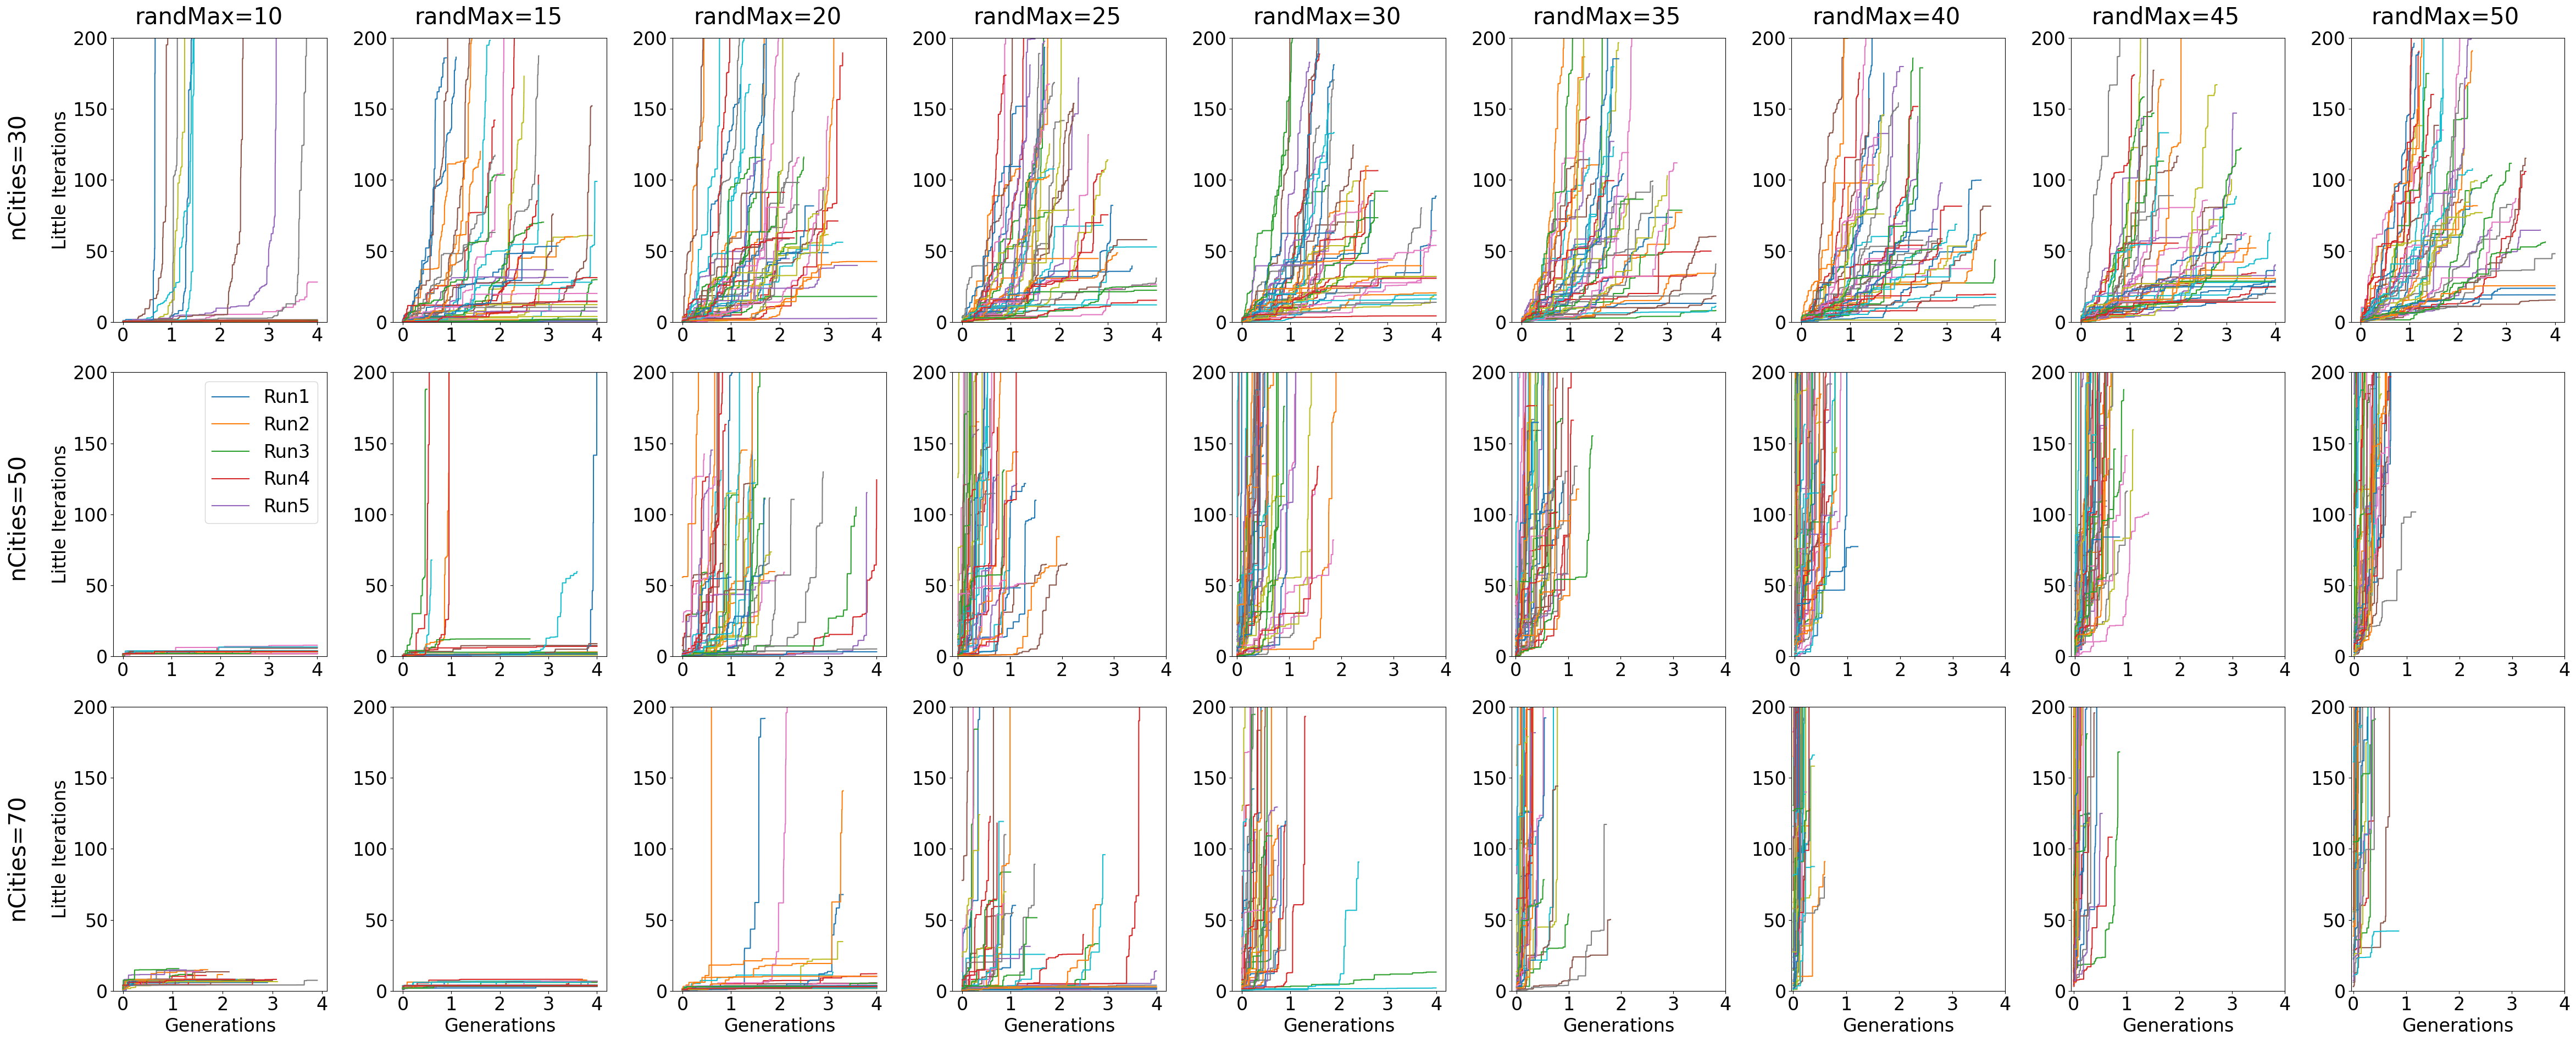

In [33]:
with open('superraam.json', 'r') as f:
    data_to_load = json.load(f)

cities = [30, 50, 70]
ranges = [10, 15, 20, 25, 30, 35, 40, 45, 50]

subplot_rows = len(cities)
subplot_cols = len(ranges)

plt.rcParams.update({'font.size': 24})
fig, axs = plt.subplots(subplot_rows, subplot_cols, figsize=(48, 20))

for i, city in enumerate(cities):
    for j, range_val in enumerate(ranges):
        run_data = data_to_load[str(city)][str(range_val)]['run_data']
        conv_list = data_to_load[str(city)][str(range_val)]['conv_list']
        max_x_values = data_to_load[str(city)][str(range_val)]['max_x_values']

        ax = axs[i, j] if subplot_rows > 1 and subplot_cols > 1 else axs[max(i, j)]

        # Plot combined data for each run
        for x_vals, y_vals in run_data:
            y_vals[0] = y_vals[1]
            ax.plot(x_vals, np.array(y_vals)/1000)

        xticklist = list(range(0, 4001, 100))[::10]

        ax.set_xticks(xticklist)
        ax.set_xticklabels([f"{x // 1000}" for x in xticklist])

        # all_y_values = [y for _, y in run_data for y in y]

        ax.set_ylim(0, 200)
        if j == 0:
            ax.set_ylabel('Little Iterations')
        if i == 2:
            ax.set_xlabel('Generations')

        # convs = np.array(conv_list)
        # ax.set_title(
            # f'Generation count\nmin={np.min(convs).round(2)}, median={int(np.median(convs))},\nmean={np.mean(convs).round(2)}, max={np.max(convs).round(2)}, std={np.std(convs).round(2)}')

        if (i == 1 and j == 0):
            ax.legend(['Run1', 'Run2', 'Run3', 'Run4', 'Run5'])

# Add row and column labels
for idx, city in enumerate(cities):
    fig.text(0.02, 0.8 - idx * 0.31, f'nCities={city}', va='center', ha='left', rotation='vertical', fontsize=30)

for idx, range_val in enumerate(ranges):
    fig.text(0.097 + idx * 0.106, 0.955, f'randMax={range_val}', ha='center', va='top', fontsize=30)

plt.tight_layout(rect=[0.03, 0, 1, 0.95])
plt.show()

In [44]:
### Get the run where the relative difference was largest in one mutation

cities = [30, 50, 70]
ranges = [10, 15, 20, 25, 30, 35, 40, 45, 50]
results_path = 'Results/'
runs = [name for name in os.listdir(results_path) if os.path.isdir(os.path.join(results_path, name))]

max_diff = 0
max_diff_info = {
    "run": None,
    "city": None,
    "range": None,
    "index": None,
    "diff": None
}

for city in cities:
    for range_val in ranges:
        k = 0

        for run in runs:
            base_path = f"Results/{run}/results{city}_{range_val}"
            if not os.path.exists(base_path + '.json'):
                continue
            k += 1
            file_paths = [base_path + '.json']
            part_num = 0
            while os.path.exists(base_path + f'_{part_num}.json'):
                file_paths.append(base_path + f'_{part_num}.json')
                part_num += 1

            combined_y_values_0 = []
            combined_y_values_1 = []

            for path in file_paths:
                try:
                    loaded = load_result(path)
                except:
                    continue

                for i, hundred_gens in enumerate(loaded):
                    if k == 1 and i == 0:
                        continue  # Skip index 0 of the first run

                    current_y_values_0 = [values[0] for values in hundred_gens[1].values()]
                    current_y_values_1 = [values[1] for values in hundred_gens[1].values()]

                    combined_y_values_0.extend(current_y_values_0)
                    combined_y_values_1.extend(current_y_values_1)

            # Calculate the maximum difference
            for index in range(len(combined_y_values_0)):
                # diff = abs(combined_y_values_0[index] - combined_y_values_1[index])
                value_0 = combined_y_values_0[index]
                value_1 = combined_y_values_1[index]
                if min(value_0, value_1) == 0:
                    continue  # Skip if the minimum value is zero to avoid division by zero
                diff = abs(value_0 - value_1) / min(value_0, value_1) * 100
                if diff > max_diff:
                    max_diff = diff
                    max_diff_info = {
                        "run": run,
                        "city": city,
                        "range": range_val,
                        "index": index,
                        "diff": diff
                    }

# Print the result
print(f"Maximum difference found: {max_diff_info}")

Maximum difference found: {'run': '6144625_run11', 'city': 30, 'range': 10, 'index': 3891, 'diff': 109229.46859903382}


In [9]:
max_diff_info = {'run': '6144625_run11', 'city': 30, 'range': 10, 'index': 3891, 'diff': 109229.46859903382}

[414, 452624]


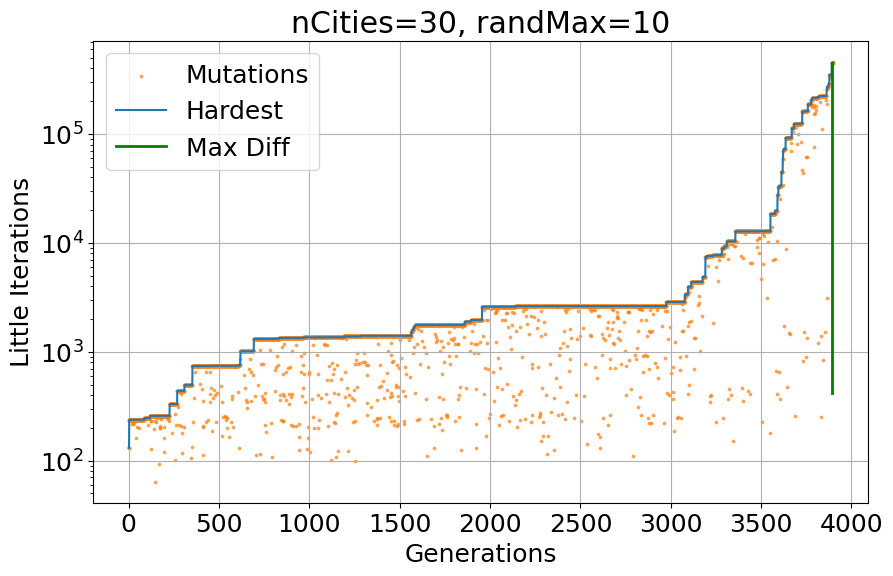

In [12]:
plt.rcdefaults()
plt.rcParams.update({'font.size': 18})

results_path = 'Results/'
base_path = f"{results_path}{max_diff_info['run']}/results{max_diff_info['city']}_{max_diff_info['range']}"

# Collect all relevant file paths
file_paths = [base_path + '.json']
part_num = 0
while os.path.exists(base_path + f'_{part_num}.json'):
    file_paths.append(base_path + f'_{part_num}.json')
    part_num += 1

combined_y_values_0 = []
combined_y_values_1 = []



# Load data from the files
for i, path in enumerate(file_paths):
    try:
        loaded = load_result(path)
    except:
        continue

    for hundred_gens in loaded:
        current_y_values_0 = [values[0] for values in hundred_gens[1].values()]
        current_y_values_1 = [values[1] for values in hundred_gens[1].values()]

        if i == 0:
            current_y_values_1[0] = current_y_values_1[1]

        combined_y_values_0.extend(current_y_values_0)
        combined_y_values_1.extend(current_y_values_1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(combined_y_values_0)), combined_y_values_0, c='tab:orange', s=3, label='Mutations', alpha=0.6)
plt.plot(range(len(combined_y_values_1)), combined_y_values_1, label='Hardest')

# Highlight the maximum difference point
max_index = max_diff_info['index']
plt.plot([max_index, max_index], [combined_y_values_0[max_index], combined_y_values_1[max_index]], color='green', linewidth=2, label='Max Diff')
print([combined_y_values_0[max_index], combined_y_values_1[max_index]])
plt.yscale('log')
plt.xlabel('Generations')
plt.ylabel('Little Iterations')
plt.title(f"nCities={max_diff_info['city']}, randMax={max_diff_info['range']}")
plt.legend()
plt.grid(True)
plt.show()

30.908 973.836


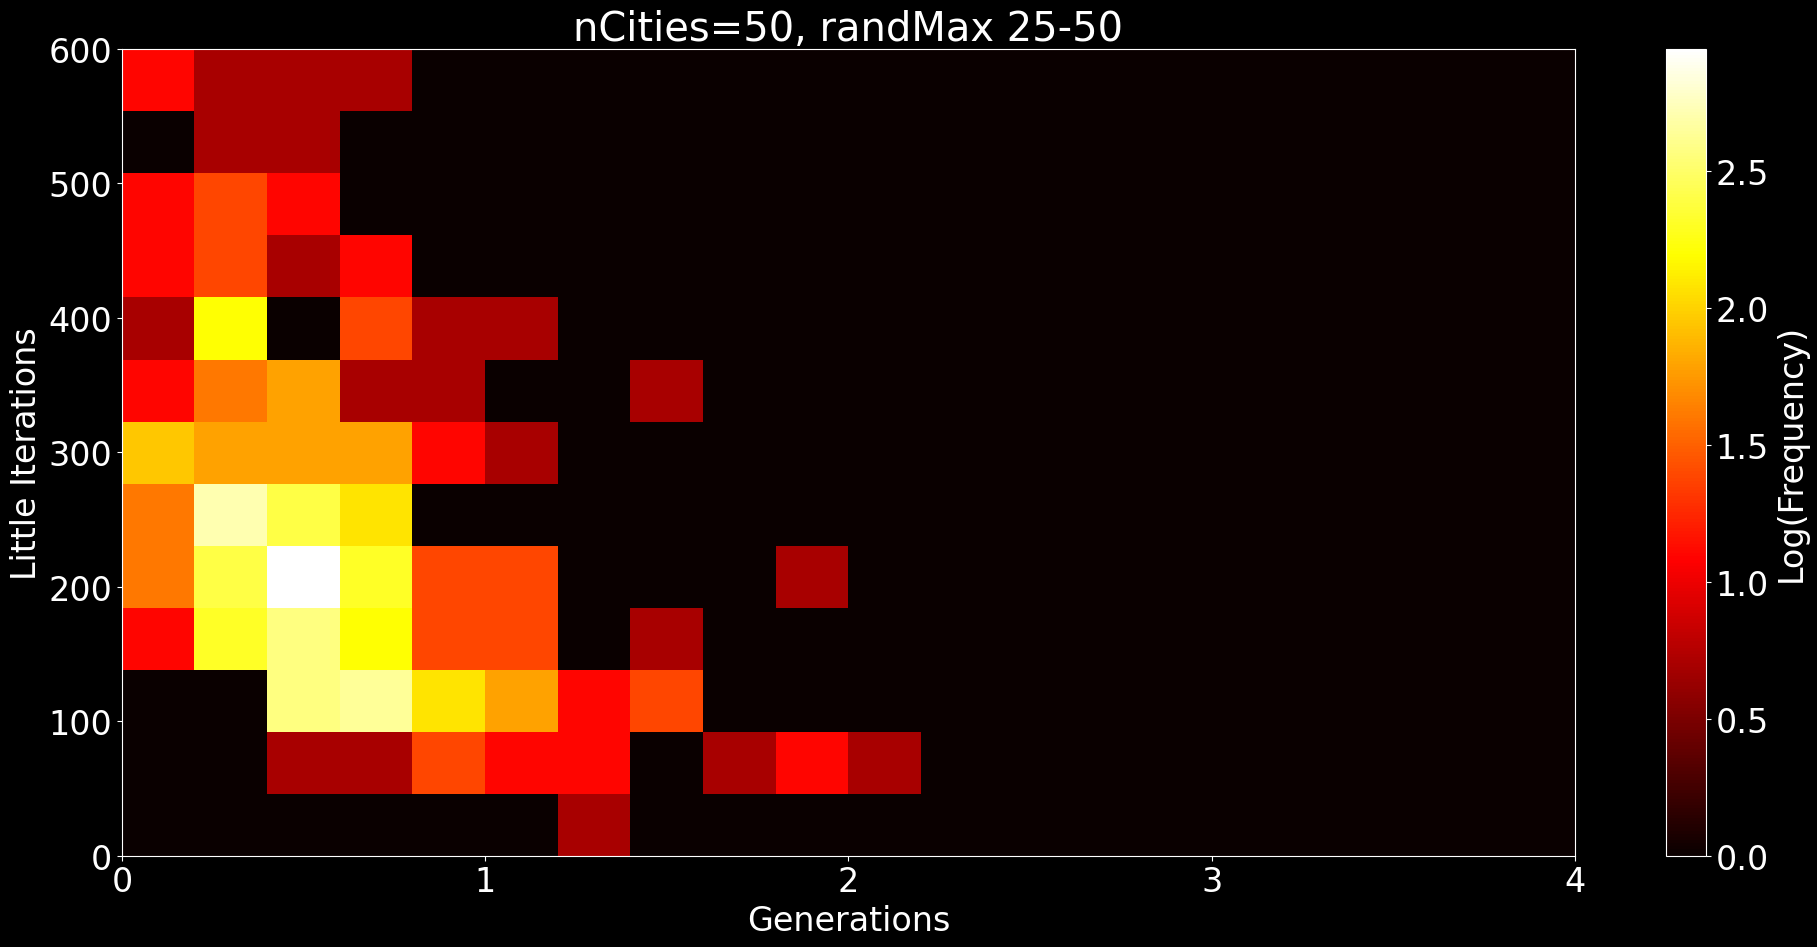

In [11]:
# Load the data
with open('superraam.json', 'r') as f:
    data_to_load = json.load(f)

plt.rcParams.update({
    'font.size': 24,
    'figure.facecolor': 'black',  # Figure background color
    'axes.facecolor': 'black',  # Axes background color
    'axes.edgecolor': 'white',  # Axes edge color
    'axes.labelcolor': 'white',  # Axes labels color
    'xtick.color': 'white',  # X tick color
    'ytick.color': 'white',  # Y tick color
    'text.color': 'white',  # Text color
    'legend.facecolor': 'black',  # Legend background color
    'legend.edgecolor': 'white'  # Legend edge color
})

# Define cities and ranges
cities = [50]
# ranges = [10, 15,20]
ranges = [25,30,35,40,45,50]

# Initialize the plot
plt.rcParams.update({'font.size': 24})
fig, ax = plt.subplots(figsize=(20, 10))

# Aggregate all data points from each run
all_x_vals = []
all_y_vals = []

for city in cities:
    for range_val in ranges:
        run_data = data_to_load[str(city)][str(range_val)]['run_data']
        for x_vals, y_vals in run_data:
            all_x_vals.append(x_vals[-1])
            all_y_vals.append((y_vals[-1] / 1000))  # Convert y values to thousands

all_x_vals = np.array(all_x_vals, dtype=float)
print(min(all_y_vals),max(all_y_vals))
# Create a 2D histogram (heatmap)
heatmap, xedges, yedges = np.histogram2d(all_x_vals, all_y_vals, bins=[20, 13], range=[[0, 4000], [0, 600]])

# Convert the heatmap values to a logarithmic scale
heatmap_log = np.log1p(heatmap)  # Using log1p to avoid log(0) issues

# Plot the heatmap
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
im = ax.imshow(heatmap_log.T, extent=extent, origin='lower', aspect='auto', cmap='hot')

# Set labels and title
ax.set_title(f'nCities={cities[0]}, randMax {min(ranges)}-{max(ranges)}')
ax.set_xlabel('Generations')
ax.set_ylabel('Little Iterations')
ax.set_xticks(range(0, 4001, 1000))
ax.set_xticklabels([f"{x // 1000}" for x in range(0, 4001, 1000)])
ax.set_ylim(0, 600)

# Add a colorbar with logarithmic scale
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Log(Frequency)')

# Show the plot
plt.tight_layout()
plt.show()

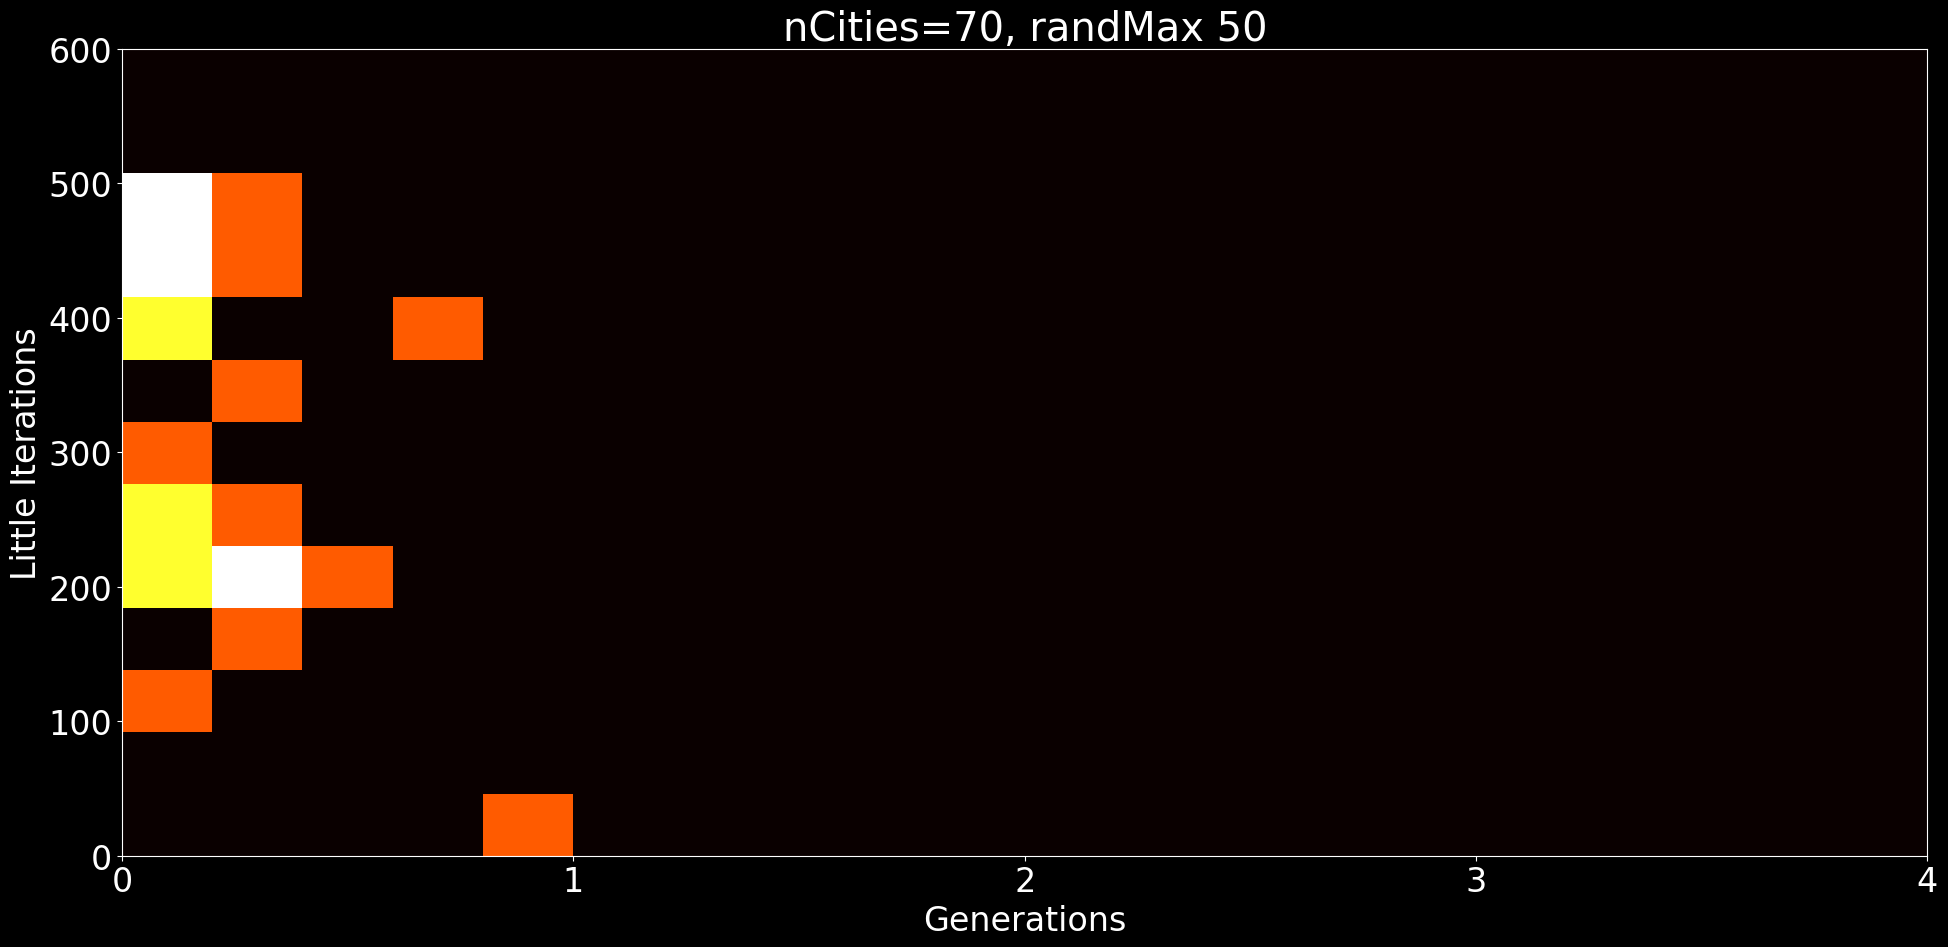

In [54]:
# Load the data
with open('superraam.json', 'r') as f:
    data_to_load = json.load(f)

plt.rcParams.update({
    'font.size': 24,
    'figure.facecolor': 'black',
    'axes.facecolor': 'black',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'text.color': 'white',
    'legend.facecolor': 'black',
    'legend.edgecolor': 'white'
})

# Define cities and ranges
cities = [70]
ranges = [10, 15, 20, 25, 30, 35, 40, 45, 50]

# Initialize the plot
fig, ax = plt.subplots(figsize=(20, 10))

def update_plot(range_val):
    ax.clear()
    
    all_x_vals = []
    all_y_vals = []
    
    for city in cities:
        run_data = data_to_load[str(city)][str(range_val)]['run_data']
        for x_vals, y_vals in run_data:
            all_x_vals.append(x_vals[-1])
            all_y_vals.append((y_vals[-1] / 1000))  # Convert y values to thousands
    
    all_x_vals = np.array(all_x_vals, dtype=float)
    
    heatmap, xedges, yedges = np.histogram2d(all_x_vals, all_y_vals, bins=[20, 13], range=[[0, 4000], [0, 600]])
    heatmap_log = np.log1p(heatmap)  # Using log1p to avoid log(0) issues
    
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    im = ax.imshow(heatmap_log.T, extent=extent, origin='lower', aspect='auto', cmap='hot')
    
    ax.set_title(f'nCities={cities[0]}, randMax {range_val}')
    ax.set_xlabel('Generations')
    ax.set_ylabel('Little Iterations')
    ax.set_xticks(range(0, 4001, 1000))
    ax.set_xticklabels([f"{x // 1000}" for x in range(0, 4001, 1000)])
    ax.set_ylim(0, 600)
    
    return im,

# Create animation
ani = FuncAnimation(fig, update_plot, frames=ranges, repeat=True)

# Save the animation as a GIF
ani.save(f'animation{cities[0]}.gif', writer='pillow', fps=1)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
def calculate_convergence_ratio(y_values):
    
    last_half = int(round(len(y_values)/2,0))
    start = y_values[last_half]
    
    return round(abs((y_values[-1] - start)/start)*100,2)

In [10]:
def percent_within_margin(numbers):
    if len(numbers) < 1000:
        return 0
    
    last_value = numbers[-1]  # Get the last value in the list
    margin = 0.05 * last_value  # Calculate 5% margin of the last value

    # Calculate the number of values within the margin (excluding the last value)
    count_within_margin = sum(1 for x in numbers[:-1] if abs(x - last_value) <= margin)

    # Calculate the percentage of these values
    percentage = (count_within_margin / (len(numbers) - 1)) * 100
    
    return percentage

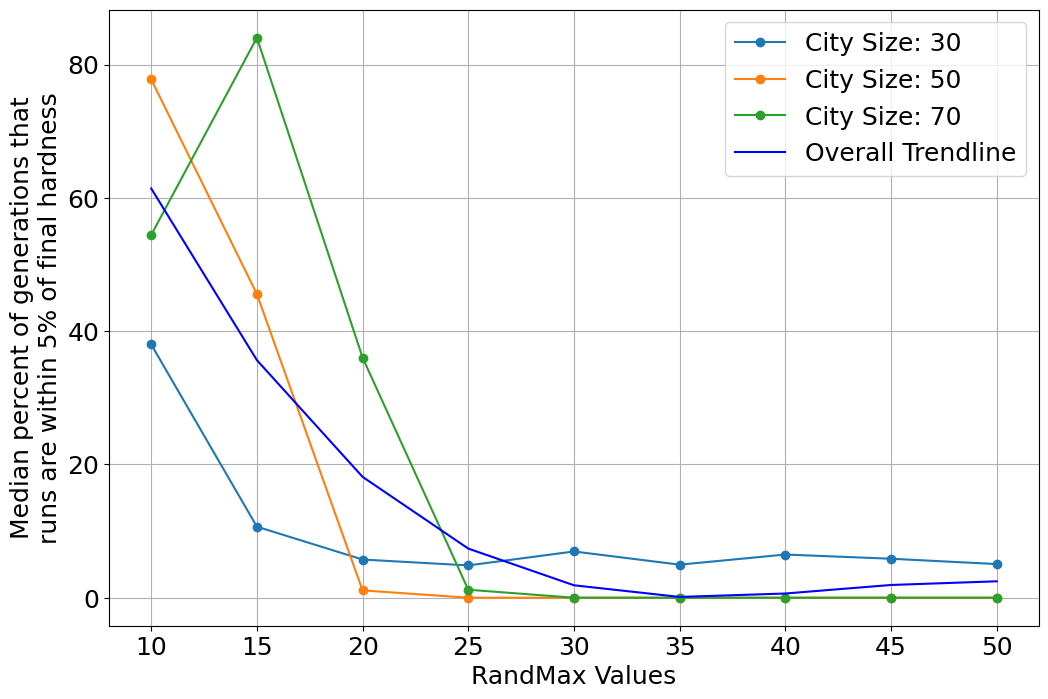

In [16]:
with open('superraam.json', 'r') as f:
    data_to_load = json.load(f)

cities = [30, 50, 70]
ranges = [10, 15, 20, 25, 30, 35, 40, 45, 50]

# Prepare a dictionary to store std values for each city across ranges
std_data = {city: [] for city in cities}
overall_std = []
overall_ranges = []


for city in cities:
    for range_val in ranges:
        conv_list = []

        run_data = data_to_load[str(city)][str(range_val)]['run_data']

        for _, combined_y_values in run_data:
            if combined_y_values:
                conv_list.append(percent_within_margin(combined_y_values))
                
        # Remove outliers and compute the standard deviation
        if conv_list:
            filtered_values = conv_list
            if filtered_values:
                std_val = np.median(np.array(conv_list)).round(2)
            else:
                std_val = 0  # Default to 0 if all values are outliers or filtering removes all data
            std_data[city].append(std_val)
            overall_std.append(std_val)
            overall_ranges.append(range_val)
        else:
            std_data[city].append(0)  # Append zero if no data is present

# Plotting the results
plt.figure(figsize=(12, 8))
for city, stds in std_data.items():
    plt.plot(ranges, stds, marker='o', label=f'City Size: {city}')

# Fitting and plotting the overall trendline
if overall_std:
    z_overall = np.polyfit(overall_ranges, overall_std, 3)
    p_overall = np.poly1d(z_overall)
    plt.plot(ranges, p_overall(ranges), "b-", label='Overall Trendline')  # Plot overall trendline

plt.xlabel('RandMax Values')
plt.ylabel(f'Median percent of generations that\nruns are within 5% of final hardness')
plt.legend()
plt.grid(True)
plt.show()

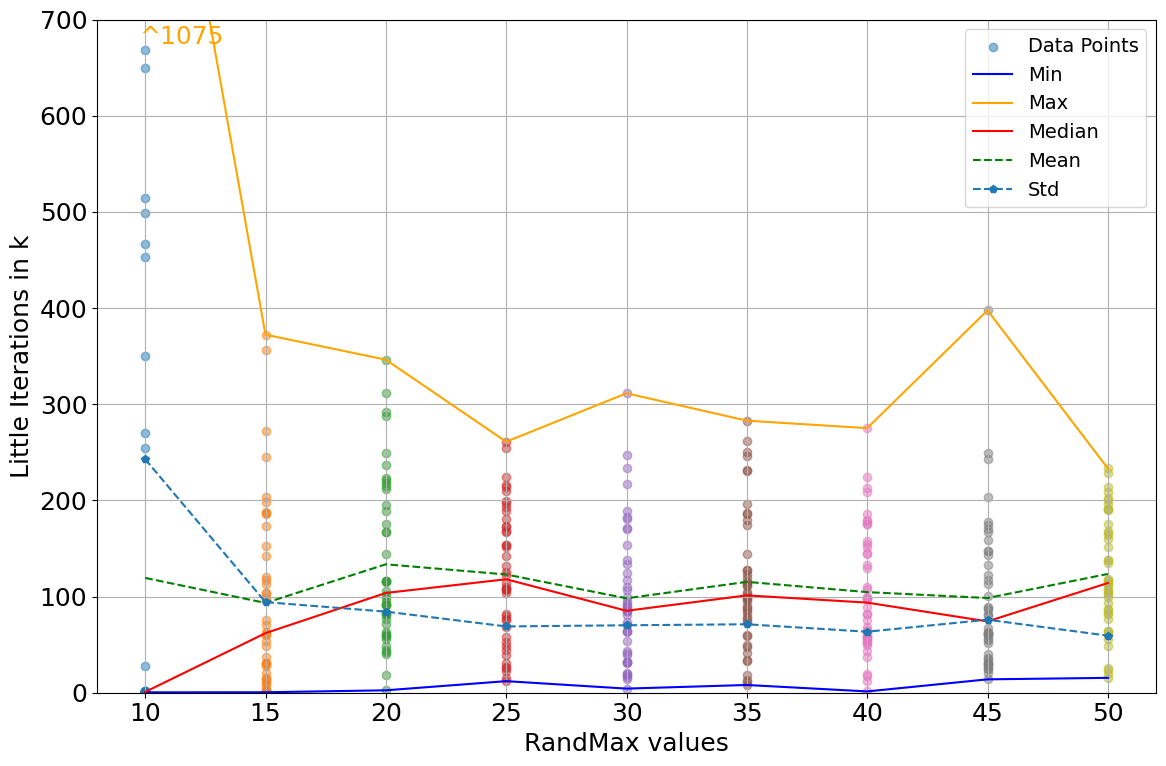

In [ ]:
# Define the path to the JSON file
input_file_path = 'last_y_values_30.json'

# Read the data from the JSON file
with open(input_file_path, 'r') as file:
    all_data = json.load(file)

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams.update({'font.size': 18})

global_min = 0
global_max = 700

min_vals = []
max_vals = []
median_vals = []
mean_vals = []
stdl = []

# Plotting
for range_val, values in all_data.items():
    if values:
        range_val = int(range_val)
        values = [i/1000 for i in values]
        x = [range_val] * len(values)
        ax.scatter(x, values, alpha=0.5, label='Data Points' if range_val == ranges[0] else "")
        
        # Statistics
        stats = np.array(values)
        min_val = np.min(stats)
        max_val = np.max(stats)
        median_val = np.median(stats)
        mean_val = np.mean(stats)
        std_val = np.std(stats)
        
        min_vals.append((range_val, min_val))
        max_vals.append((range_val, max_val))
        median_vals.append((range_val, median_val))
        mean_vals.append((range_val, mean_val))
        stdl.append((range_val, std_val))
        
        # Annotation if max value exceeds global_max
        if max_val > global_max:
            ax.text(range_val+1.5, global_max-25, f'^{int(max_val)}', ha='center', color='orange')

# Plotting statistics as lines across the graph
min_vals_x, min_vals_y = zip(*min_vals)
max_vals_x, max_vals_y = zip(*max_vals)
median_vals_x, median_vals_y = zip(*median_vals)
mean_vals_x, mean_vals_y = zip(*mean_vals)
std_vals_x, std_vals_y = zip(*stdl)

ax.plot(min_vals_x, min_vals_y, 'b-', label='Min')
ax.plot(max_vals_x, max_vals_y, 'orange', label='Max')
ax.plot(median_vals_x, median_vals_y, 'r-', label='Median')
ax.plot(mean_vals_x, mean_vals_y, 'g--', label='Mean')
ax.plot(std_vals_x, std_vals_y, 'p--', label='Std')

ax.set_xlabel('RandMax values')
ax.set_ylabel('Little Iterations in k')
ax.set_xticks(ranges)
ax.set_ylim(global_min, global_max)
plt.grid(True)

# Adding legend to the plot
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # removing duplicate labels
ax.legend(by_label.values(), by_label.keys(), fontsize=14)

plt.tight_layout()
plt.show()


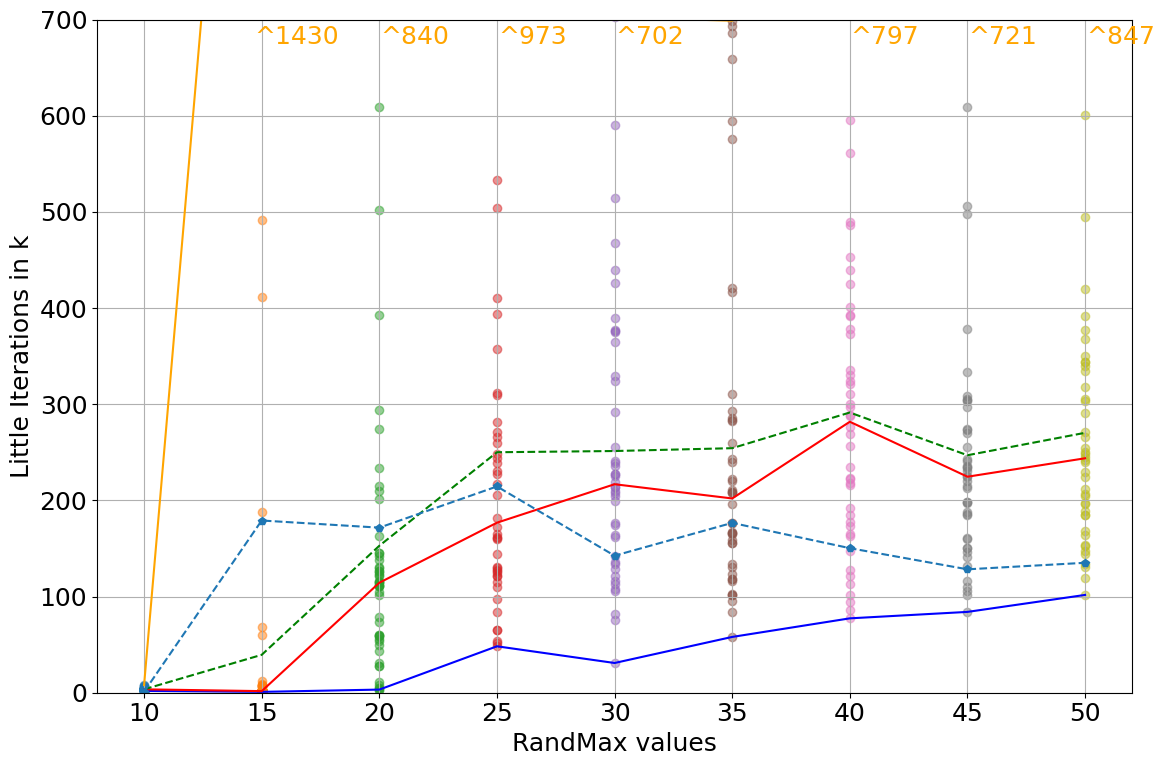

In [ ]:
# Define the path to the JSON file
input_file_path = 'last_y_values_50.json'

# Read the data from the JSON file
with open(input_file_path, 'r') as file:
    all_data = json.load(file)

fig, ax = plt.subplots(figsize=(12, 8))

global_min = 0
global_max = 700

min_vals = []
max_vals = []
median_vals = []
mean_vals = []
stdl = []

# Plotting
for range_val, values in all_data.items():
    if values:
        range_val = int(range_val)
        values = [i/1000 for i in values]
        x = [range_val] * len(values)
        ax.scatter(x, values, alpha=0.5, label='Data Points' if range_val == ranges[0] else "")
        
        # Statistics
        stats = np.array(values)
        min_val = np.min(stats)
        max_val = np.max(stats)
        median_val = np.median(stats)
        mean_val = np.mean(stats)
        std_val = np.std(stats)
        
        min_vals.append((range_val, min_val))
        max_vals.append((range_val, max_val))
        median_vals.append((range_val, median_val))
        mean_vals.append((range_val, mean_val))
        stdl.append((range_val, std_val))
        
        # Annotation if max value exceeds global_max
        if max_val > global_max:
            ax.text(range_val+1.5, global_max-25, f'^{int(max_val)}', ha='center', color='orange')

# Plotting statistics as lines across the graph
min_vals_x, min_vals_y = zip(*min_vals)
max_vals_x, max_vals_y = zip(*max_vals)
median_vals_x, median_vals_y = zip(*median_vals)
mean_vals_x, mean_vals_y = zip(*mean_vals)
std_vals_x, std_vals_y = zip(*stdl)

ax.plot(min_vals_x, min_vals_y, 'b-', label='Min')
ax.plot(max_vals_x, max_vals_y, 'orange', label='Max')
ax.plot(median_vals_x, median_vals_y, 'r-', label='Median')
ax.plot(mean_vals_x, mean_vals_y, 'g--', label='Mean')
ax.plot(std_vals_x, std_vals_y, 'p--', label='Std')

ax.set_xlabel('RandMax values')
ax.set_ylabel('Little Iterations in k')
ax.set_xticks(ranges)
ax.set_ylim(global_min, global_max)
plt.grid(True)

# Adding legend to the plot
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # removing duplicate labels

plt.tight_layout()
plt.show()


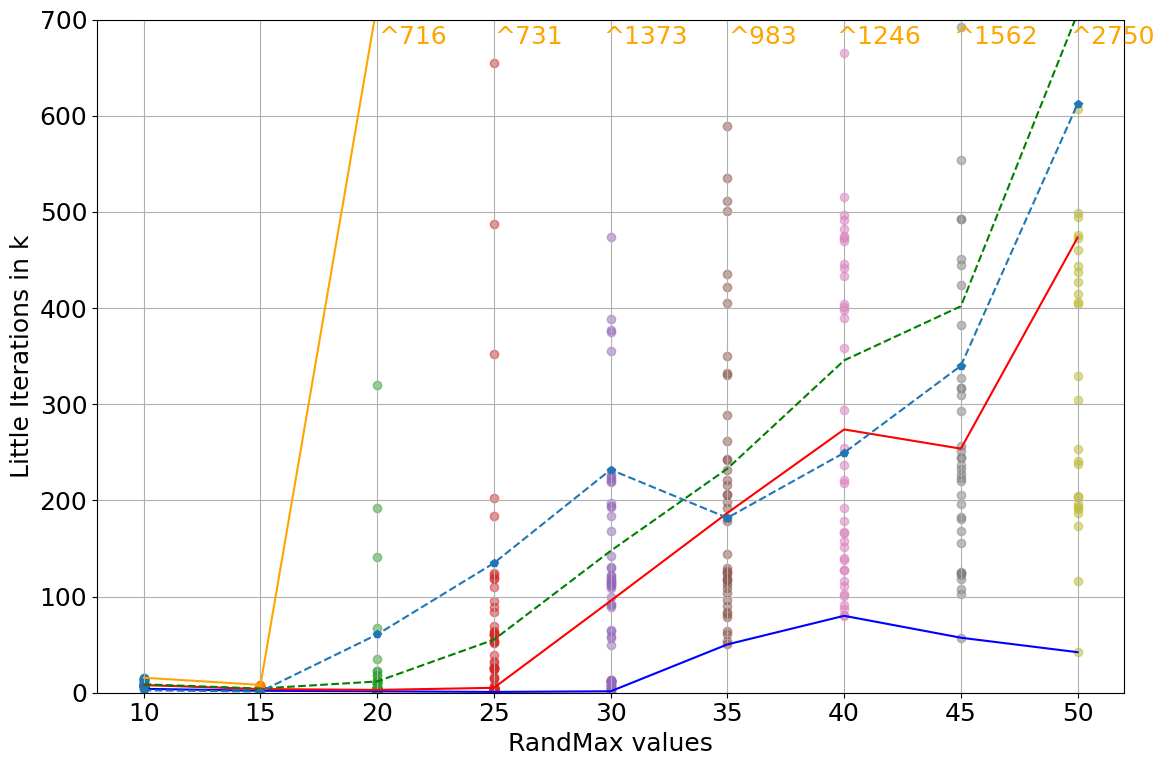

In [ ]:
# Define the path to the JSON file
input_file_path = 'last_y_values_70.json'

# Read the data from the JSON file
with open(input_file_path, 'r') as file:
    all_data = json.load(file)

fig, ax = plt.subplots(figsize=(12, 8))

global_min = 0
global_max = 700

min_vals = []
max_vals = []
median_vals = []
mean_vals = []
stdl = []

# Plotting
for range_val, values in all_data.items():
    if values:
        range_val = int(range_val)
        values = [i/1000 for i in values]
        x = [range_val] * len(values)
        ax.scatter(x, values, alpha=0.5, label='Data Points' if range_val == ranges[0] else "")
        
        # Statistics
        stats = np.array(values)
        min_val = np.min(stats)
        max_val = np.max(stats)
        median_val = np.median(stats)
        mean_val = np.mean(stats)
        std_val = np.std(stats)
        
        min_vals.append((range_val, min_val))
        max_vals.append((range_val, max_val))
        median_vals.append((range_val, median_val))
        mean_vals.append((range_val, mean_val))
        stdl.append((range_val, std_val))
        
        # Annotation if max value exceeds global_max
        if max_val > global_max:
            ax.text(range_val+1.5, global_max-25, f'^{int(max_val)}', ha='center', color='orange')

# Plotting statistics as lines across the graph
min_vals_x, min_vals_y = zip(*min_vals)
max_vals_x, max_vals_y = zip(*max_vals)
median_vals_x, median_vals_y = zip(*median_vals)
mean_vals_x, mean_vals_y = zip(*mean_vals)
std_vals_x, std_vals_y = zip(*stdl)

ax.plot(min_vals_x, min_vals_y, 'b-', label='Min')
ax.plot(max_vals_x, max_vals_y, 'orange', label='Max')
ax.plot(median_vals_x, median_vals_y, 'r-', label='Median')
ax.plot(mean_vals_x, mean_vals_y, 'g--', label='Mean')
ax.plot(std_vals_x, std_vals_y, 'p--', label='Std')

ax.set_xlabel('RandMax values')
ax.set_ylabel('Little Iterations in k')
ax.set_xticks(ranges)
ax.set_ylim(global_min, global_max)
plt.grid(True)

# Adding legend to the plot
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # removing duplicate labels

plt.tight_layout()
plt.show()


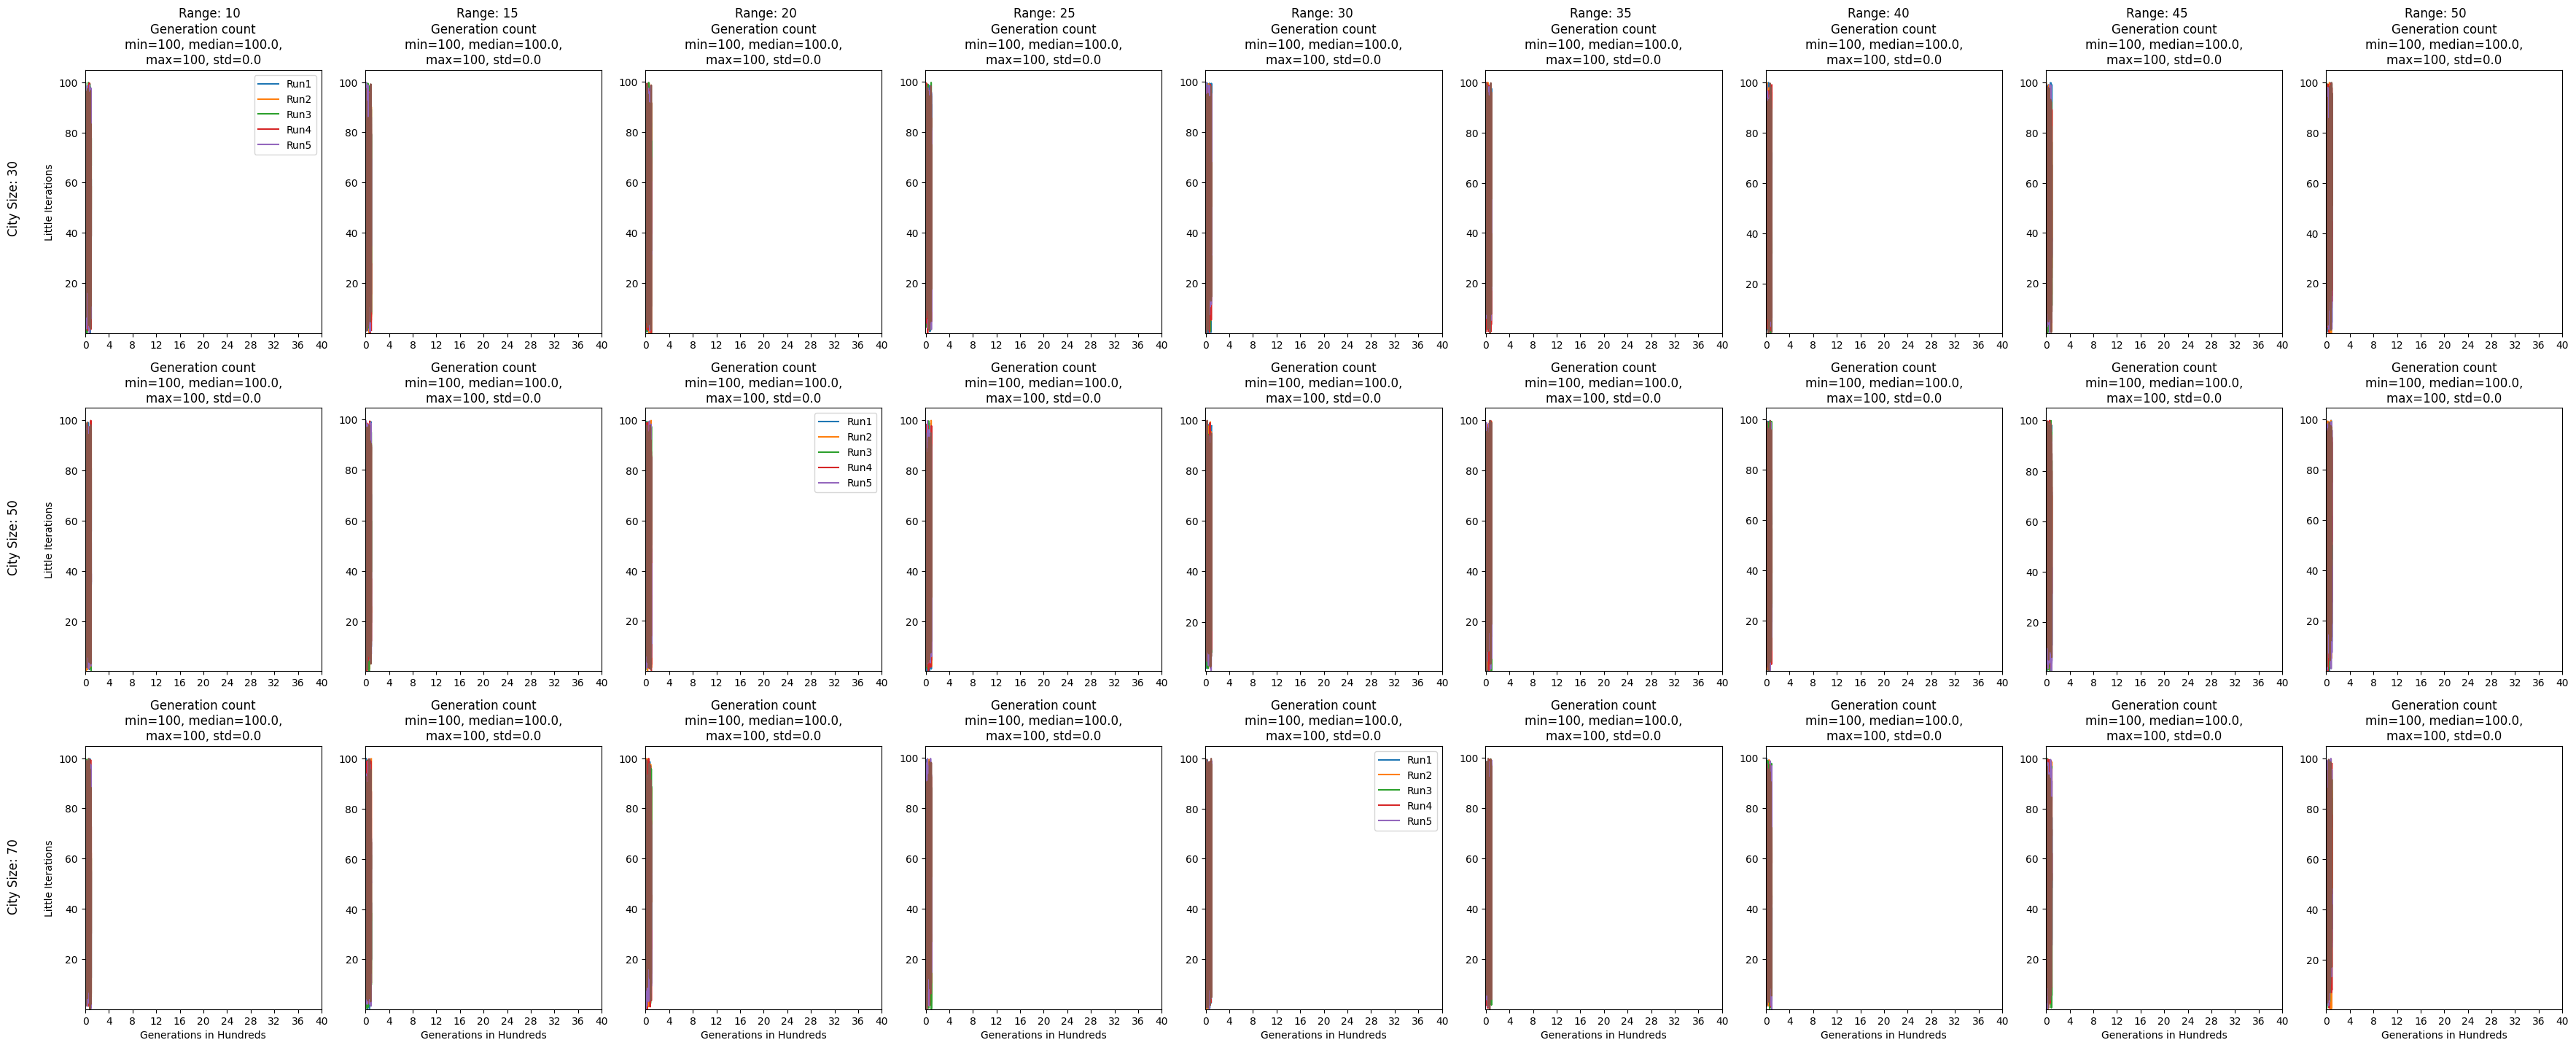

In [21]:
### Design superraam 

# Define dummy data function
def generate_dummy_data(num_points):
    x = np.arange(num_points)
    y = np.random.random(num_points) * 100
    return x, y

# Define dummy parameters
cities = [30, 50, 70]
ranges = [10, 15, 20, 25, 30, 35, 40, 45, 50]
dummy_runs = [f'Run_{i}' for i in range(6)]

# Define the subplot grid
subplot_rows = len(cities)
subplot_cols = len(ranges)

fig, axs = plt.subplots(subplot_rows, subplot_cols, figsize=(36, 15))

for i, city in enumerate(cities):
    for j, range_val in enumerate(ranges):
        max_x_values = []
        run_data = []
        conv_list = []
        k = 0

        for run in dummy_runs:
            if k > 5:
                break
            k += 1

            combined_x_values, combined_y_values = generate_dummy_data(100)

            if len(combined_x_values) > len(max_x_values):
                max_x_values = combined_x_values
            run_data.append((combined_x_values, combined_y_values))
            if combined_y_values.size > 0:
                conv_list.append(len(combined_y_values))

        ax = axs[i, j] if subplot_rows > 1 and subplot_cols > 1 else axs[max(i, j)]

        # Plot combined data for each run
        for x_vals, y_vals in run_data:
            ax.plot(x_vals, y_vals)

        xticklist = list(range(0, 4001, 100))[::4]

        ax.set_xticks(xticklist)
        ax.set_xticklabels([f"{x//100}" for x in xticklist])

        all_y_values = [y for _, y in run_data for y in y]
        ax.set_ylim(bottom=min(all_y_values) - (min(all_y_values) / 7))
        if j == 0:
            ax.set_ylabel('Little Iterations')
        if i == 2:
            ax.set_xlabel('Generations in Hundreds')

        convs = np.array(conv_list)
        ax.set_title(f'Generation count\nmin={np.min(convs).round(2)}, median={np.median(convs).round(2)},\nmax={np.max(convs).round(2)}, std={np.std(convs).round(2)}')

        if (i == 0 and j == 0) or (i == 1 and j == 2) or (i == 2 and j == 4):
            ax.legend(['Run1', 'Run2', 'Run3', 'Run4', 'Run5'])

# Add row and column labels
for idx, city in enumerate(cities):
    fig.text(0.02, 0.78 - idx * 0.31, f'City Size: {city}', va='center', ha='left', rotation='vertical', fontsize=12)

for idx, range_val in enumerate(ranges):
    fig.text(0.097 + idx * 0.106, 0.955, f'Range: {range_val}', ha='center', va='top', fontsize=12)

plt.tight_layout(rect=[0.03, 0, 1, 0.95])
plt.show()


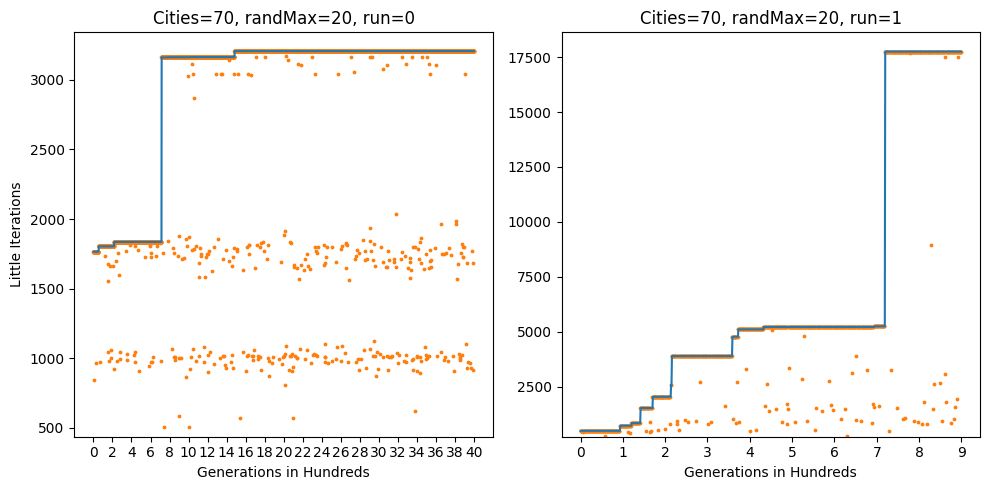

In [25]:
cities = [70]
runs = [0,1]

subplot_rows = len(cities)
subplot_cols = len(runs)

fig, axs = plt.subplots(subplot_rows, subplot_cols, figsize=(10, 5)) 

for i, city in enumerate(cities):
    for j, run_val in enumerate(runs):
        path = f"results{city}_20_{run_val}.json"
        try:
           loaded = load_result(path)
        except:
           continue
        
        x_values = list(loaded.keys())
        y_values_0 = [values[0] for values in loaded.values()]  
        y_values_1 = [values[1] for values in loaded.values()] 
        y_values_1[0] = y_values_1[1]
        
        if subplot_rows == 1 and subplot_cols == 1:
            ax = axs
            ax.set_xlabel('Matrices Mutated')
        else:
            if subplot_rows > 1 and subplot_cols > 1:
                ax = axs[i, j]
            elif subplot_rows > 1:
                ax = axs[i]
            else:
                ax = axs[j]

        ax.scatter(x_values, y_values_0, label='Current mutation', c='tab:orange', s=3)
        ax.plot(x_values, y_values_1, label='Hardest mutation')

        xticklist = list(range(0, int(x_values[-1]) + 5, 100))
        if len(xticklist) > 20:
            xticklist = xticklist[::2]  # Reduce the number of ticks by taking every 2nd tick
        
        ax.set_xticks(xticklist)
        ax.set_xticklabels([f"{x//100}" for x in xticklist])

        ax.set_ylim(bottom=min(y_values_0)-(min(y_values_0)/7))
        if j == 0:
          ax.set_ylabel('Little Iterations')
        ax.set_xlabel('Generations in Hundreds')
        ax.set_title(f'Cities={city}, randMax=20, run={run_val}')
        if i == 1 & j== 1:
          ax.legend()

plt.tight_layout()
plt.show()

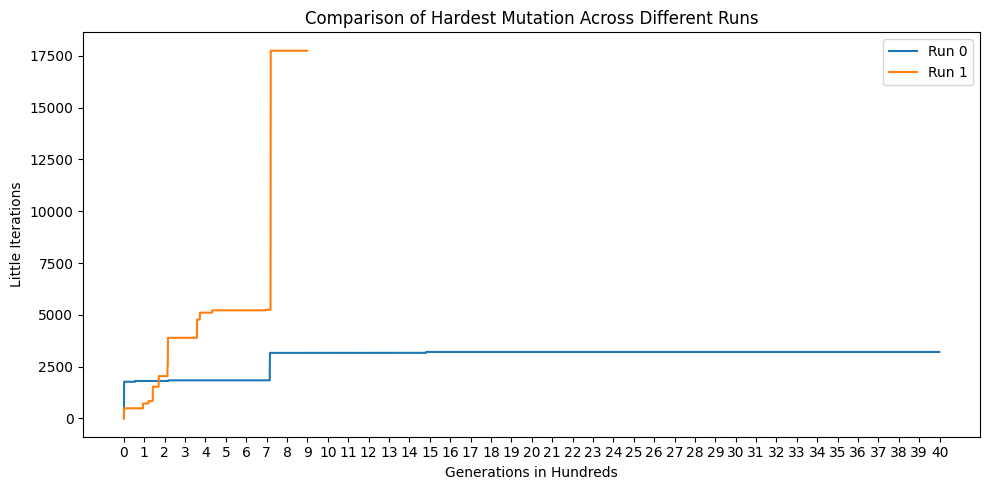

In [13]:
import matplotlib.pyplot as plt
import json

cities = [70]
runs = [0, 1]

# Function to load results from a file
def load_result(path):
    with open(path, 'r') as file:
        return json.load(file)

# Prepare to store the x values and y values for the hardest mutation
x_values_run0 = []
y_values_run0 = []
y_values_run1 = []

# Load and process data
for city in cities:
    for run_val in runs:
        path = f"Results/results{city}_20_{run_val}.json"
        try:
            loaded = load_result(path)
        except FileNotFoundError:
            print(f"File not found: {path}")
            continue

        if run_val == 0:  # Take x-values and y-values from run 0
            x_values_run0 = list(loaded.keys())
            y_values_run0 = [values[1] for values in loaded.values()]  # Hardest mutation
        else:
            x_values_run1 = list(loaded.keys())
            y_values_run1 = [values[1] for values in loaded.values()]  # Hardest mutation for run 1

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot for run 0
ax.plot(x_values_run0, y_values_run0, label='Run 0')

# Plot for run 1
if y_values_run1:  # Ensure there is data for run 1
    ax.plot(x_values_run1, y_values_run1, label='Run 1')

# Customize the graph
xticklist = list(range(0, int(x_values_run0[-1]) + 5, 100))
xticklabellist = list(range(0, int(x_values_run0[-1]) + 5, 100))
ax.set_xticks(xticklist)
ax.set_xticklabels([round(x / 100) for x in xticklabellist])

ax.set_xlabel('Generations in Hundreds')
ax.set_ylabel('Little Iterations')
ax.set_title('Comparison of Hardest Mutation Across Different Runs')
ax.legend()

plt.tight_layout()
plt.show()

### Future work? Characteristics on the data

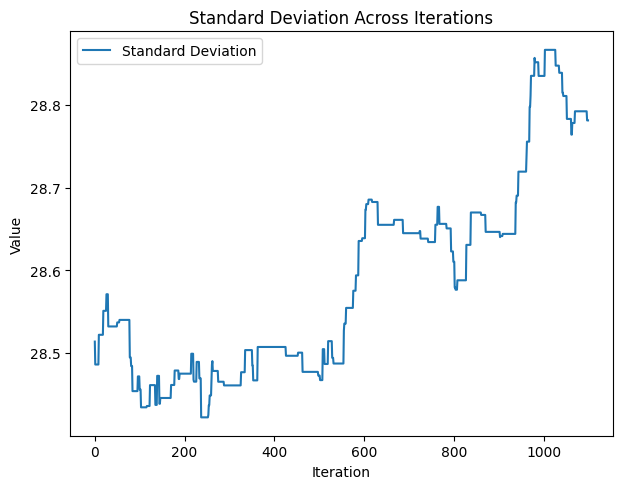

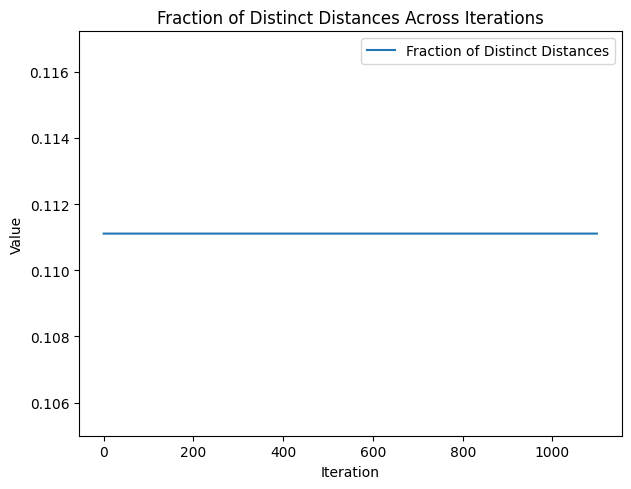

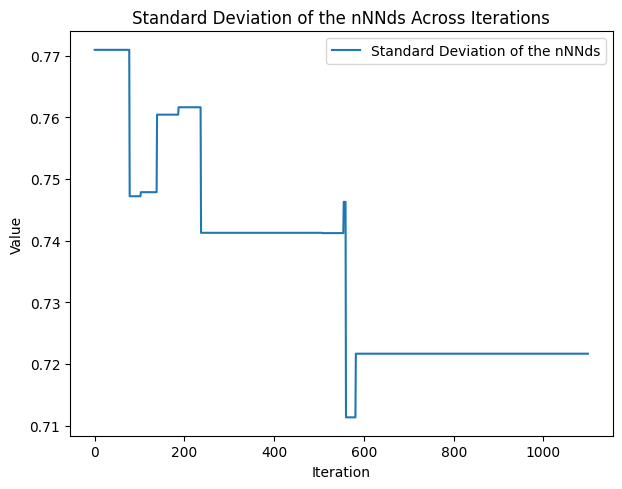

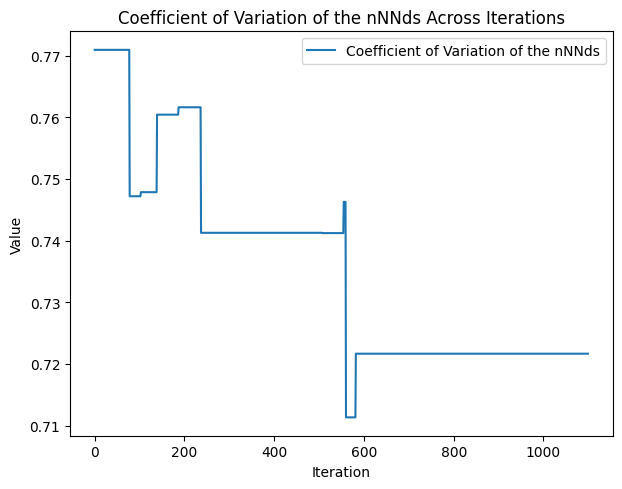

In [12]:
path = f"Results/results30_100_0.json"
loaded = load_result(path)
l = []

hardest_matrices = []
for values in loaded.values():
    if values[0] > values[1]:
        hardest_matrices.append(values[4])
    else:
        hardest_matrices.append(hardest_matrices[-1])

for x in hardest_matrices:
    # Excluding infinite values for some calculations
    finite_distances = np.ma.masked_invalid(x)

    # 1. Standard Deviation (SD)
    sd = np.std(finite_distances)

    # 4. Fraction of Distinct Distances
    unique_distances = np.unique(finite_distances)
    fraction_distinct = unique_distances.size / finite_distances.size

    # 6. Standard Deviation of the Normalized Nearest-Neighbour Distances (nNNd)
    nearest = np.min(x, axis=1)
    mean_nearest = np.mean(nearest)
    normalized_nNNd = nearest / mean_nearest
    sd_nNNd = np.std(normalized_nNNd)

    # 7. Coefficient of Variation of the nNNds
    cv_nNNd = sd_nNNd / np.mean(normalized_nNNd)

    l.append([sd, fraction_distinct, sd_nNNd, cv_nNNd])

data = np.array(l)
for i, x in enumerate(['Standard Deviation', 'Fraction of Distinct Distances', 
                        'Standard Deviation of the nNNds',
                        'Coefficient of Variation of the nNNds']):
    plt.figure(figsize=(7, 5.25))
    plt.plot(data[:, i], label=x)
    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title(f'{x} Across Iterations')
    plt.legend()
    plt.show()

#### Standard deviation

30 cities, between 1 and 10, pearson statistic: -0.041, Pvalue: 0.8945645098
30 cities, between 1 and 100, pearson statistic: 0.927, Pvalue: 0.0
30 cities, between 1 and 1000, pearson statistic: 0.888, Pvalue: 0.0
50 cities, between 1 and 10, pearson statistic: 0.869, Pvalue: 0.0555836474
50 cities, between 1 and 100, pearson statistic: 0.856, Pvalue: 0.0
50 cities, between 1 and 1000, pearson statistic: 0.937, Pvalue: 0.0
Pvalue rounded to 10 decimals


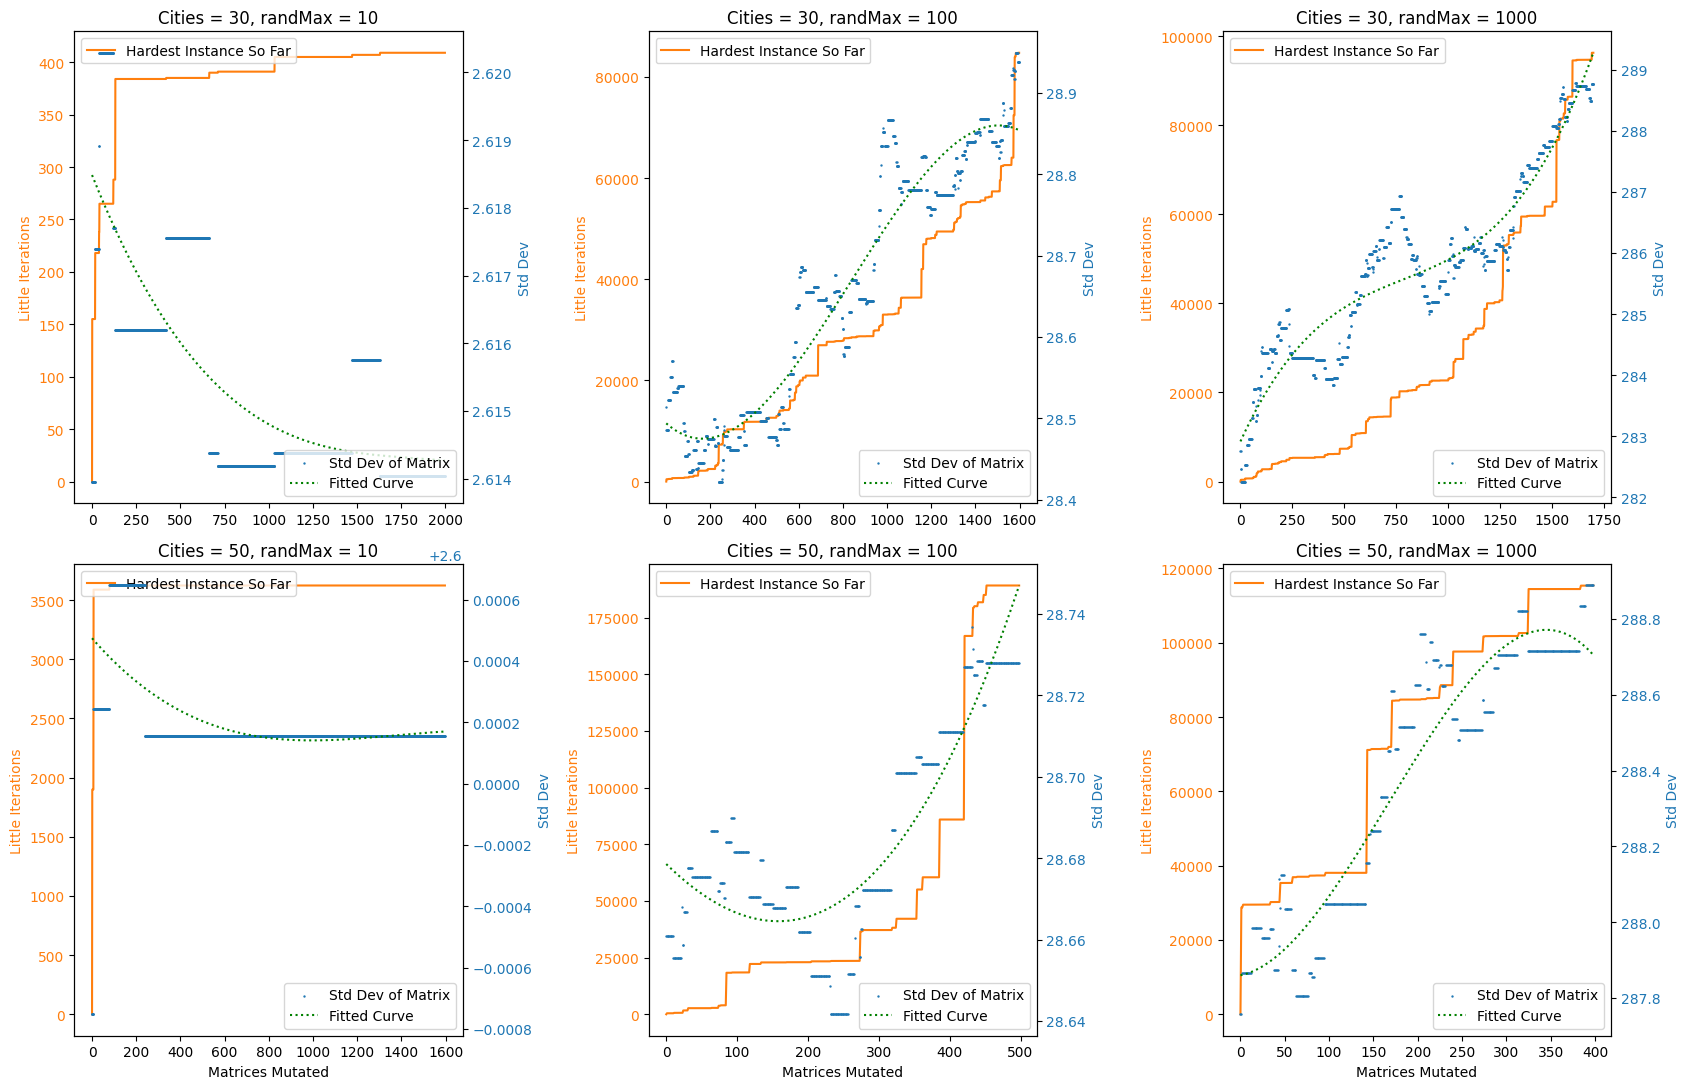

In [15]:
from scipy.stats import pearsonr

cities = [30, 50]
ranges = [10, 100, 1000]

subplot_rows = len(cities)
subplot_cols = len(ranges)

fig, axs = plt.subplots(subplot_rows, subplot_cols, figsize=(17, 11)) 

for i, city in enumerate(cities):
    for j, range_val in enumerate(ranges):
        path = f"Results/results{city}_{range_val}_0.json"
        loaded = load_result(path)
        
        # matrices of hardest instances at every mutation
        hardest_matrices = []
        for values in loaded.values():
            if values[0] > values[1]:
                hardest_matrices.append(values[4])
            else:
                hardest_matrices.append(hardest_matrices[-1])
        
        # these are just list comprehensions but instead of lists they are numpy arrays
        # numpy arrays make it easy to remove duplicates before we get to the correlation calculation
        y_values_std = np.fromiter((np.std(np.ma.masked_invalid(x)) for x in hardest_matrices), float)
        y_values = np.fromiter((values[1] for values in loaded.values()), float)
        x_values = list(range(len(y_values)))
        
        if subplot_rows > 1 and subplot_cols > 1:
            ax = axs[i, j]
        elif subplot_rows > 1:
            ax = axs[i]
        else:
            ax = axs[j] if subplot_cols > 1 else axs

        # Plot the sorted current instances
        color = 'tab:orange'
        ax.plot(x_values, y_values, label='Hardest Instance So Far', color=color)
        ax.set_ylabel('Little Iterations', color=color)
        ax.tick_params(axis='y', labelcolor=color)

        # Create a twin y-axis to plot the standard deviation
        ax2 = ax.twinx()
        color = 'tab:blue'
        ax2.scatter(x_values, y_values_std, label='Std Dev of Matrix', color=color, s=0.5)
        ax2.set_ylabel('Std Dev', color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        # Plot the fitted curve
        poly_deg = 3
        ax2.plot(x_values, np.poly1d(np.polyfit(x_values, y_values_std, poly_deg))(x_values), label='Fitted Curve', color='green', linestyle=':')
        
        if i == 1:
          ax.set_xlabel('Matrices Mutated')
        ax.set_title(f'Cities = {city}, randMax = {range_val}')
        ax.legend(loc='upper left')
        ax2.legend(loc='lower right')
        
        # remove duplicates before pearson correlation
        y_values_std = y_values_std[np.ma.unique(y_values,True)[1]]
        y_values = y_values[np.ma.unique(y_values,True)[1]]
        
        print(f"{city} cities, between 1 and {range_val}, pearson statistic: {round(pearsonr(y_values_std, y_values)[0],3)}, Pvalue: {round(pearsonr(y_values_std, y_values)[1],10)}")
print("Pvalue rounded to 10 decimals")

plt.tight_layout()
plt.show()

#### Fraction of Distinct Distances

C:\tools\Manim\Lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


30 cities, between 1 and 10, pearson statistic: nan, Pvalue: nan
30 cities, between 1 and 100, pearson statistic: nan, Pvalue: nan
30 cities, between 1 and 1000, pearson statistic: 0.554, Pvalue: 0.0
50 cities, between 1 and 10, pearson statistic: nan, Pvalue: nan
50 cities, between 1 and 100, pearson statistic: nan, Pvalue: nan
50 cities, between 1 and 1000, pearson statistic: -0.681, Pvalue: 1.345e-07
Pvalue rounded to 10 decimals


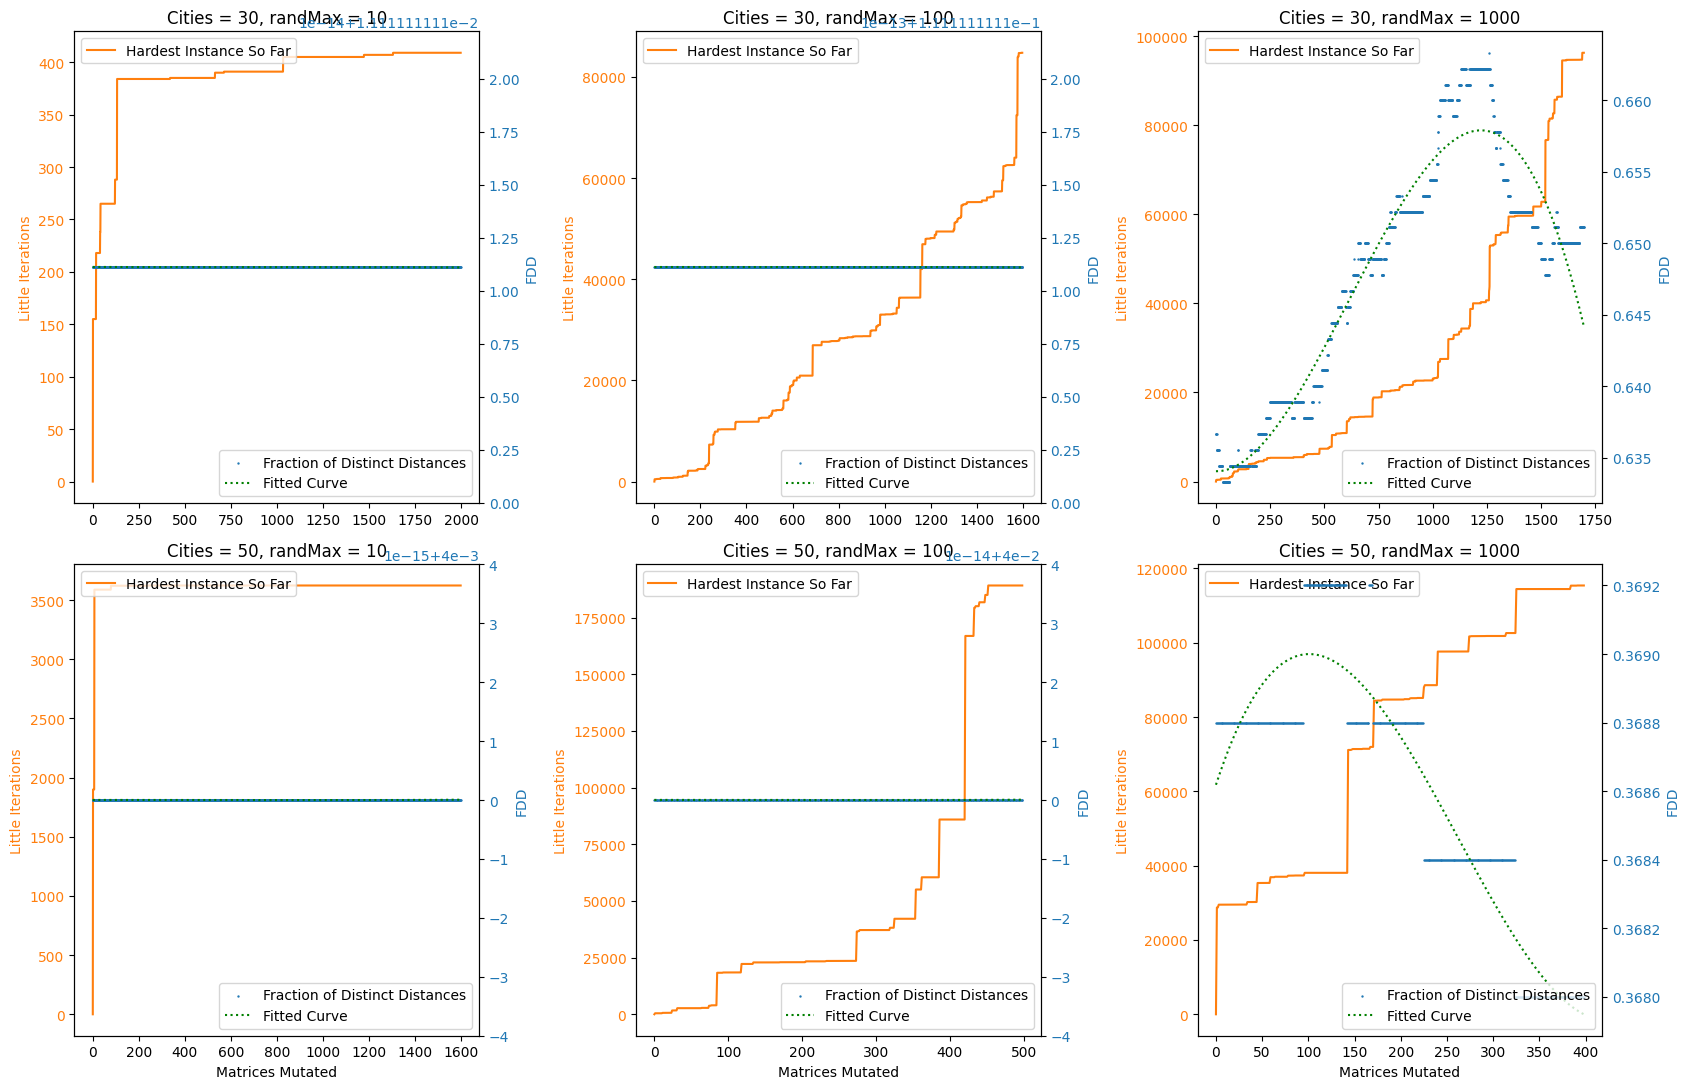

In [16]:
cities = [30, 50]
ranges = [10, 100, 1000]

subplot_rows = len(cities)
subplot_cols = len(ranges)

fig, axs = plt.subplots(subplot_rows, subplot_cols, figsize=(17, 11)) 

for i, city in enumerate(cities):
    for j, range_val in enumerate(ranges):
        path = f"Results/results{city}_{range_val}_0.json"
        loaded = load_result(path)

        # matrices of hardest instances at every mutation
        hardest_matrices = []
        for values in loaded.values():
            if values[0] > values[1]:
                hardest_matrices.append(values[4])
            else:
                hardest_matrices.append(hardest_matrices[-1])

        finite_distances = [np.ma.masked_invalid(x) for x in hardest_matrices]
        y_values_fdd = np.fromiter((np.unique(values).size / values.size for values in finite_distances),float)
        y_values = np.fromiter((values[1] for values in loaded.values()),float)
        x_values = list(range(len(y_values)))
        
        if subplot_rows > 1 and subplot_cols > 1:
            ax = axs[i, j]
        elif subplot_rows > 1:
            ax = axs[i]
        else:
            ax = axs[j] if subplot_cols > 1 else axs

        # Plot the sorted current instances
        color = 'tab:orange'
        ax.plot(x_values, y_values, label='Hardest Instance So Far', color=color)
        ax.set_ylabel('Little Iterations', color=color)
        ax.tick_params(axis='y', labelcolor=color)

        # Create a twin y-axis to plot the standard deviation
        ax2 = ax.twinx()
        color = 'tab:blue'
        ax2.scatter(x_values, y_values_fdd, label='Fraction of Distinct Distances', color=color, s=0.5)
        ax2.set_ylabel('FDD', color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        # Plot the fitted curve
        poly_deg = 3
        ax2.plot(x_values, np.poly1d(np.polyfit(x_values, y_values_fdd, poly_deg))(x_values), label='Fitted Curve', color='green', linestyle=':')
        
        if i == 1:
          ax.set_xlabel('Matrices Mutated')
        ax.set_title(f'Cities = {city}, randMax = {range_val}')
        ax.legend(loc='upper left')
        ax2.legend(loc='lower right')

        y_values_fdd = y_values_fdd[np.ma.unique(y_values,True)[1]]
        y_values = y_values[np.ma.unique(y_values,True)[1]]
        print(f"{city} cities, between 1 and {range_val}, pearson statistic: {round(pearsonr(y_values_fdd, y_values)[0],3)}, Pvalue: {round(pearsonr(y_values_fdd, y_values)[1],10)}")
print("Pvalue rounded to 10 decimals")
    
plt.tight_layout()
plt.show()

#### Std Dev of nNNds

30 cities, between 1 and 10, pearson statistic: nan, Pvalue: nan
30 cities, between 1 and 100, pearson statistic: -0.092, Pvalue: 0.2450670921
30 cities, between 1 and 1000, pearson statistic: 0.34, Pvalue: 8.979e-07
50 cities, between 1 and 10, pearson statistic: nan, Pvalue: nan
50 cities, between 1 and 100, pearson statistic: 0.336, Pvalue: 0.0294392846
50 cities, between 1 and 1000, pearson statistic: 0.238, Pvalue: 0.1073709491
Pvalue rounded to 10 decimals


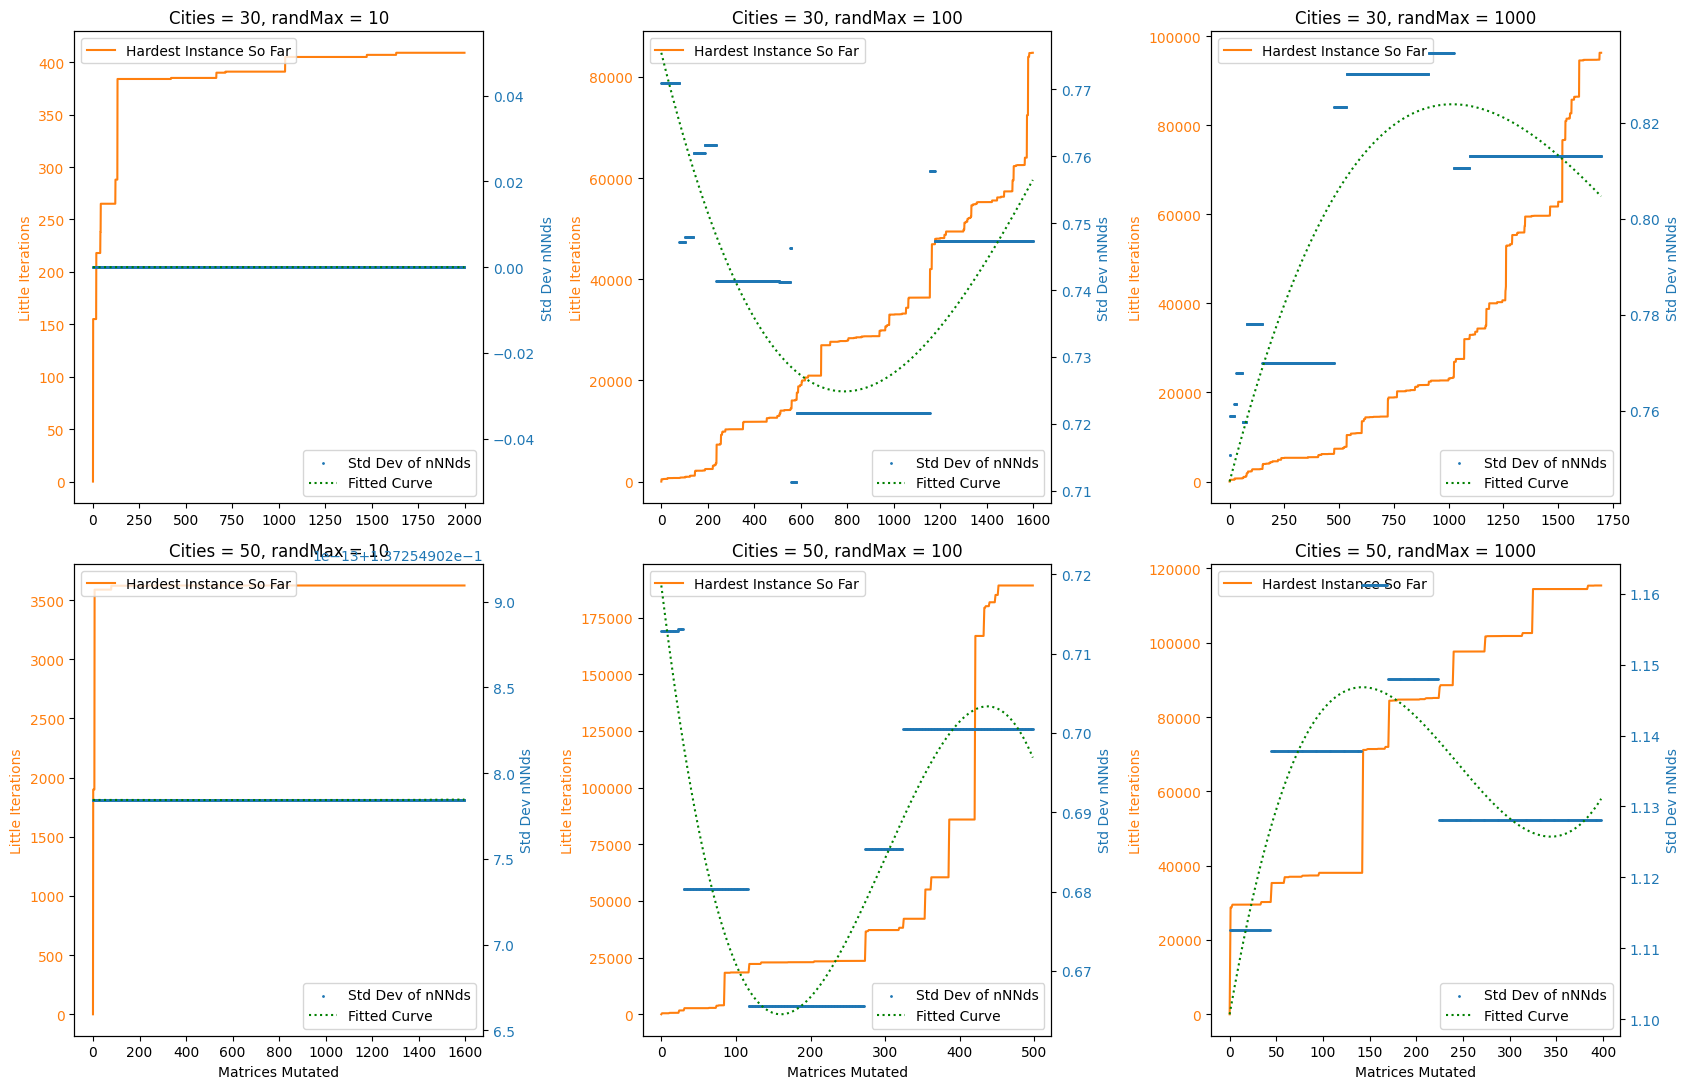

In [17]:
cities = [30, 50]
ranges = [10, 100, 1000]

subplot_rows = len(cities)
subplot_cols = len(ranges)

fig, axs = plt.subplots(subplot_rows, subplot_cols, figsize=(17, 11)) 

for i, city in enumerate(cities):
    for j, range_val in enumerate(ranges):
        path = f"Results/results{city}_{range_val}_0.json"
        loaded = load_result(path)

        # matrices of hardest instances at every mutation
        hardest_matrices = []
        for values in loaded.values():
            if values[0] > values[1]:
                hardest_matrices.append(values[4])
            else:
                hardest_matrices.append(hardest_matrices[-1])
        
        y_values_nearest = [np.min(x, axis=1) for x in hardest_matrices]
        y_values_mean_nearest = [np.mean(values) for values in y_values_nearest]
        # normalize distances and take std
        y_values_sd_nNNd = np.fromiter((np.std(x/y) for x,y in zip(y_values_nearest,y_values_mean_nearest)),float)

        y_values = np.fromiter((values[1] for values in loaded.values()),float)
        x_values = list(range(len(y_values)))
        
        if subplot_rows > 1 and subplot_cols > 1:
            ax = axs[i, j]
        elif subplot_rows > 1:
            ax = axs[i]
        else:
            ax = axs[j] if subplot_cols > 1 else axs

        # Plot the sorted current instances
        color = 'tab:orange'
        ax.plot(x_values, y_values, label='Hardest Instance So Far', color=color)
        ax.set_ylabel('Little Iterations', color=color)
        ax.tick_params(axis='y', labelcolor=color)

        # Create a twin y-axis to plot the standard deviation
        ax2 = ax.twinx()
        color = 'tab:blue'
        ax2.scatter(x_values, y_values_sd_nNNd, label='Std Dev of nNNds', color=color, s=1)
        ax2.set_ylabel('Std Dev nNNds', color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        # Plot the fitted curve
        poly_deg = 3        
        ax2.plot(x_values, np.poly1d(np.polyfit(x_values, y_values_sd_nNNd, poly_deg))(x_values), label='Fitted Curve', color='green', linestyle=':')

        if i == 1:
          ax.set_xlabel('Matrices Mutated')
        ax.set_title(f'Cities = {city}, randMax = {range_val}')
        ax.legend(loc='upper left')
        ax2.legend(loc='lower right')

        y_values_sd_nNNd = y_values_sd_nNNd[np.ma.unique(y_values,True)[1]]
        y_values = y_values[np.ma.unique(y_values,True)[1]]
        print(f"{city} cities, between 1 and {range_val}, pearson statistic: {round(pearsonr(y_values_sd_nNNd, y_values)[0],3)}, Pvalue: {round(pearsonr(y_values_sd_nNNd, y_values)[1],10)}")
print("Pvalue rounded to 10 decimals")

plt.tight_layout()
plt.show()

In [ ]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt

# # Mock data generation function
# def generate_mock_data(num_points):
#     return np.linspace(0, 1000, num_points), np.random.rand(num_points)

# # Define the parameters
# cities = [30, 50, 70]
# ranges = [10, 15, 20, 25, 30, 35, 40, 45, 50]
# results_path = 'Results/'
# runs = [name for name in os.listdir(results_path) if os.path.isdir(os.path.join(results_path, name))]
# runs = runs[:5]

# subplot_rows = len(cities)
# subplot_cols = len(ranges)

# fig, axs = plt.subplots(subplot_rows, subplot_cols, figsize=(36, 15))

# for i, city in enumerate(cities):
#     for j, range_val in enumerate(ranges):
#         times = []
#         max_x_values = 0

#         # Loop over each run
#         for run in runs:
#             base_path = f"{results_path}/{run}/results{city}_{range_val}.json"

#             # Mock data loading
#             x_values, y_values = generate_mock_data(200)

#             # Update times mock
#             times.append(np.random.uniform(1, 12))

#             # Collect maximum x values for axis limit setting
#             if x_values[-1] > max_x_values:
#                 max_x_values = x_values[-1]

#             ax = axs[i, j]
#             ax.plot(x_values, y_values, label=f'{run}')  # Plot each run's data

#         # Set X ticks and labels
#         ax.set_xticks(np.linspace(0, max_x_values, num=11))
#         ax.set_xticklabels([f"{int(x // 100)}" for x in np.linspace(0, max_x_values, num=11)])

#         # Calculate and display statistics in the title
#         min_time, mean_time, max_time, std_time = np.min(times), np.mean(times), np.max(times), np.std(times)
#         ax.set_title(f'WCT min={min_time:.2f}h, mean={mean_time:.2f}h,\nmax={max_time:.2f}h, std={std_time:.2f}h')

#         # Set labels
#         if j == 0:
#             ax.set_ylabel('Iterations')
#         if i == subplot_rows - 1:
#             ax.set_xlabel('Generations (in hundreds)')

#         if (i, j) in [(0, 0), (1, 2), (2, 4)]:
#             ax.legend()

# # Add row and column labels
# for idx, city in enumerate(cities):
#     fig.text(0, 0.79 - idx * 0.31, f'City Size: {city}', va='center', ha='left', rotation='vertical', fontsize=12)

# for idx, range_val in enumerate(ranges):
#     fig.text(0.097 + idx * 0.106, 0.95, f'Range: {range_val}', ha='center', va='top', fontsize=12)

# plt.tight_layout(rect=[0.03, 0, 1, 0.95])
# plt.show()